In [2]:
#Import required package
import pandas as pd   #Pandas is used to handle and analyze dataframes

#Load the Excel file
#Sets the full path to the Excel file using a raw string (r"") so that backslashes are treated correctly in Windows file paths
file_path = r"C:\Users\Bala Sowntharya\Documents\Crop_Production_Prediction_Project\FAOSTAT_data.xlsx"
df = pd.read_excel(file_path) #Load data into DataFrame

#Preview data info
print(df.info())      #Displays column names, non-null counts, and data types

#Preview top rows
print(df.head())      #Displays first 5 rows of the dataset

#Commands Used
#df.info() - Summary of data structure and missing values
#df.head() - First 5 rows sample for quick data look

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224647 entries, 0 to 224646
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       224647 non-null  object 
 1   Domain            224647 non-null  object 
 2   Area Code (M49)   224647 non-null  int64  
 3   Area              224647 non-null  object 
 4   Element Code      224647 non-null  int64  
 5   Element           224647 non-null  object 
 6   Item Code (CPC)   224642 non-null  object 
 7   Item              224647 non-null  object 
 8   Year Code         224647 non-null  int64  
 9   Year              224647 non-null  int64  
 10  Unit              224645 non-null  object 
 11  Value             218130 non-null  float64
 12  Flag              224643 non-null  object 
 13  Flag Description  224634 non-null  object 
 14  Note              5098 non-null    object 
dtypes: float64(1), int64(4), object(10)
memory usage: 25.7+ MB
None
  Do

In [4]:
#Column Cleaning, Missing Values, and Filtering

#Data Cleaning - Renaming and Missing Value Handling
#Clean and standardize column names
df.columns = df.columns.str.strip()              #Removes extra whitespace from column names
df.columns = df.columns.str.lower()              #Converts all column names to lowercase for consistency
df.columns = df.columns.str.replace(' ', '_')    #Replaces spaces with underscores to avoid syntax issues

#Check for missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())                         #Shows count of null values column-wise

#Drop rows where key values are missing (EG: year, value)
df = df.dropna(subset=['year', 'value'])  #Drops rows missing critical values

#Remove duplicate rows if any
df = df.drop_duplicates()                        #Keeps the dataset clean and unique

#Reset index after dropping rows
df.reset_index(drop=True, inplace=True)          #Resets index to reflect new row order

#Short Summary
#Renamed all column headers consistently
#Removed unnecessary spaces and formatting
#Checked and handled missing values
#Dropped duplicates and reset the index

#Commands Used
#df.columns.str.strip()	    Removes leading/trailing spaces in column names
#df.columns.str.lower()	    Converts all column names to lowercase
#df.columns.str.replace()	Replaces spaces with underscores for easier access
#df.isnull().sum()	        Counts missing values for each column
#df.dropna(subset=[...])	Removes rows with missing values in specific key columns
#df.drop_duplicates()	    Removes exact duplicate rows
#df.reset_index(drop=True)	Resets index numbers after dropping rows to keep it sequential

Missing values in each column:
domain_code              0
domain                   0
area_code_(m49)          0
area                     0
element_code             0
element                  0
item_code_(cpc)          5
item                     0
year_code                0
year                     0
unit                     2
value                 6517
flag                     4
flag_description        13
note                219549
dtype: int64


In [5]:
#Check Actual Column Names
print(df.columns)

Index(['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code',
       'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description', 'note'],
      dtype='object')


In [4]:
print(df.columns.tolist())

['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code', 'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit', 'value', 'flag', 'flag_description', 'note']


In [5]:
#Select Relevant Columns & Convert Data Types

#Filter Columns and Fix Data Types
#Display all available column names
print("Available columns:")
print(df.columns.tolist())  #Lists all columns to identify which ones to keep

#Select only relevant columns needed for analysis
df = df[['area', 'item', 'element', 'year', 'unit', 'value']]  #Keep only required columns

#Convert 'year' to integer type (if not already)
df['year'] = df['year'].astype(int)  #Ensures year is in proper numeric format

#Convert 'value' column to numeric in case it's read as object
df['value'] = pd.to_numeric(df['value'], errors='coerce')  #Handles non-numeric entries gracefully

#Preview the updated DataFrame
print("Data preview after filtering and type conversion:")
print(df.head())  #Confirm structure is clean and numeric columns are usable

#Short Summary
#Filtered down the dataset to only the necessary columns for modeling
#Ensured that year and value columns are numeric for regression models
#Handled potential non-numeric issues using errors='coerce' during conversion

#Commands Used
#df.columns.tolist()	                Lists all current columns
#df = df[[...]]	                        Keeps only selected relevant columns
#df['year'].astype(int)	                Converts 'year' to integer
#pd.to_numeric(..., errors='coerce')	Converts strings to numbers, replaces invalid entries with NaN
#df.head()	                             Previews first 5 rows to confirm structure

Available columns:
['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code', 'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit', 'value', 'flag', 'flag_description', 'note']
Data preview after filtering and type conversion:
          area               item         element  year   unit    value
0  Afghanistan  Almonds, in shell  Area harvested  2019     ha  29203.0
1  Afghanistan  Almonds, in shell           Yield  2019  kg/ha   1308.3
2  Afghanistan  Almonds, in shell      Production  2019      t  38205.0
3  Afghanistan  Almonds, in shell  Area harvested  2020     ha  22134.0
4  Afghanistan  Almonds, in shell           Yield  2020  kg/ha   1775.9


In [6]:
#Exploratory Data Analysis (EDA)

#1) Analyze Crop Distribution
#Crop Types: Study the distribution of the Item column to identify the most and least cultivated crops across regions.
#Geographical Distribution: Explore the Area column to understand which regions focus on specific crops or have high agricultural activity.

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\1882933327.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette='viridis')


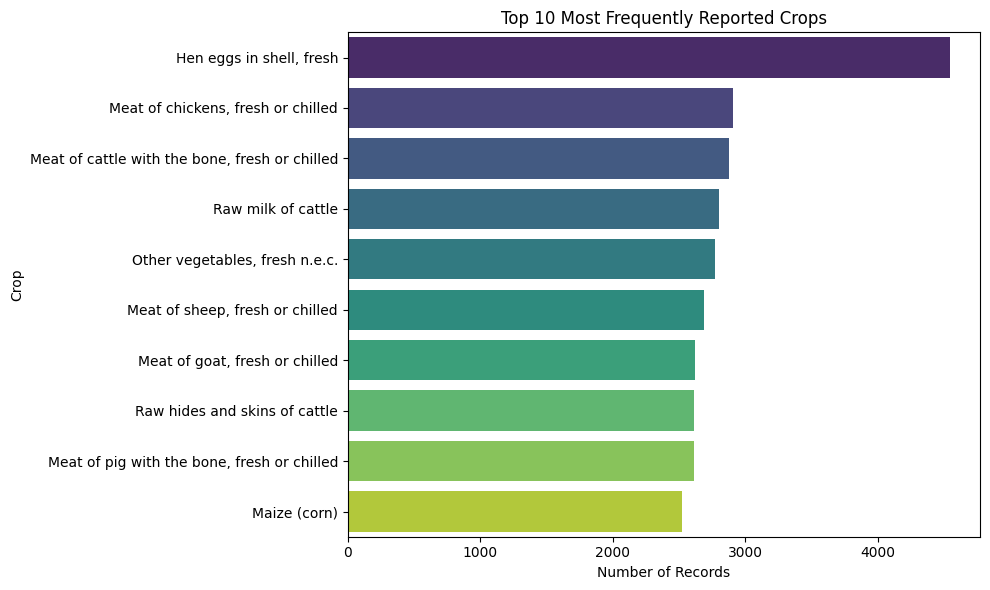

In [7]:
# 1)Crop Distribution Analysis
#Crop Types: Study the distribution of the Item column to identify the most and least cultivated crops across regions

#Goal: Identify the most and least cultivated crops using frequency count and visualize the top 10 with a bar plot

#Imports necessary libraries for data visualization
import matplotlib.pyplot as plt     #Importing matplotlib for plotting
import seaborn as sns               #Importing seaborn for enhanced visualization

#Counts the frequency of each crop in the 'item' column and selects the top 10
top_crops = df['item'].value_counts().head(10) 

#Sets the size of the plot to make it more readable
plt.figure(figsize=(10, 6)) 

#Creates a horizontal bar chart using seaborn
sns.barplot(x=top_crops.values, y=top_crops.index, palette='viridis') 

#Adds a title to the plot
plt.title('Top 10 Most Frequently Reported Crops') 

#Labels the x-axis
plt.xlabel('Number of Records') 

#Labels the y-axis
plt.ylabel('Crop') 

#Adjusts plot layout to prevent clipping of labels
plt.tight_layout() 

#Displays the final plot
plt.show() 

#Short Summary
#Counted the most frequently reported crops using value_counts()
#Selected top 10 crops using .head(10)
#Visualized the result with a horizontal bar chart using seaborn
#Applied layout and labeling commands for a polished appearance

#Commands Used
#df['item'].value_counts() - Counts how often each crop appears
#.head(10)                 - Picks the top 10 most frequent crops
#figsize=(10, 6)           - Width = 10 inches, Height = 6 inches
#x=top_crops.values        - Number of records
#y=top_crops.index         - Crop names
#palette='viridis'         - Color theme
#plt.tight_layout()        - Adjusts plot layout to prevent clipping of labels

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\557999039.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette='magma')


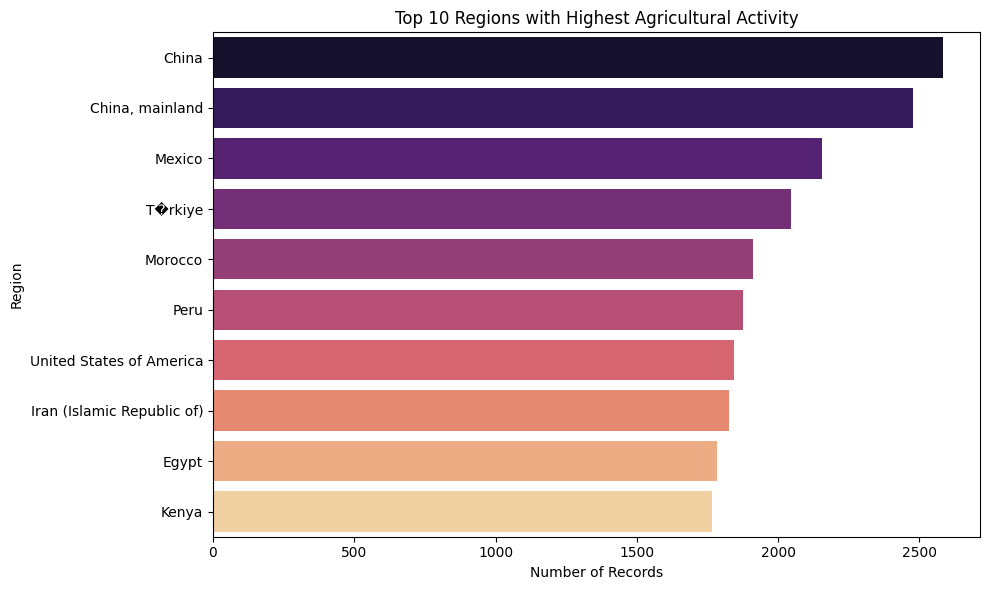

In [8]:
##2) Geographical Distribution Analysis

#Region Focus: Explore the 'Area' column to understand which regions focus on specific crops or have high agricultural activity

#Goal        : Identify regions with the highest number of agricultural records and visualize the top 10 most active regions

#Imports necessary libraries for data visualization
import matplotlib.pyplot as plt     #Importing matplotlib for plotting
import seaborn as sns               #Importing seaborn for enhanced visualization

#Counts the frequency of each region in the 'Area' column and selects the top 10
top_regions = df['area'].value_counts().head(10) 

#Sets the size of the plot to make it more readable
plt.figure(figsize=(10, 6)) 

#Creates a horizontal bar chart using seaborn
sns.barplot(x=top_regions.values, y=top_regions.index, palette='magma') 

#Adds a title to the plot
plt.title('Top 10 Regions with Highest Agricultural Activity') 

#Labels the x-axis
plt.xlabel('Number of Records') 

#Labels the y-axis
plt.ylabel('Region') 

#Adjusts plot layout to prevent clipping of labels
plt.tight_layout() 

#Displays the final plot
plt.show() 

#Short Summary
#Counted the most agriculturally active regions using value_counts()
#Selected top 10 regions using .head(10)
#Visualized the result with a horizontal bar chart using seaborn
#Applied layout and labeling commands for a polished appearance

#Commands Used
#df['Area'].value_counts() - Counts how often each region appears
#.head(10)                 - Picks the top 10 most active regions
#figsize=(10, 6)           - Width = 10 inches, Height = 6 inches
#x=top_regions.values      - Number of records
#y=top_regions.index       - Region names
#palette='magma'           - Color theme
#plt.tight_layout()        - Adjusts plot layout to prevent clipping of labels


In [9]:
#2) Temporal Analysis
#Yearly Trends  : Analyze the Year column to detect trends in Area harvested, Yield, and Production over time.
#Growth Analysis: Investigate if certain crops or regions show increasing or decreasing trends in yield or production

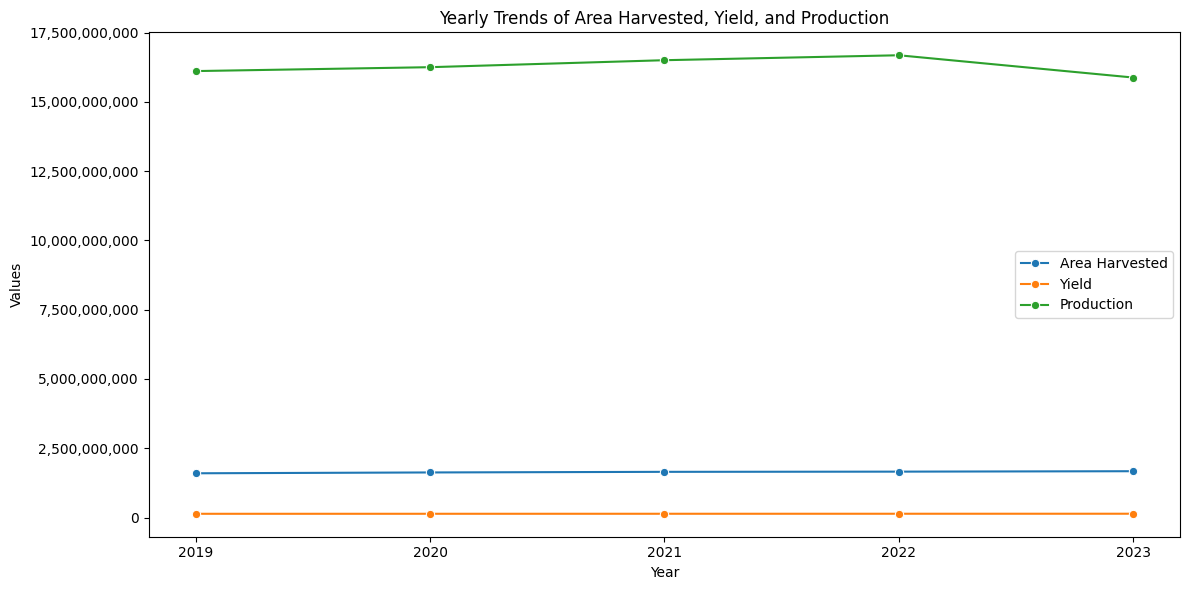

In [10]:
##3) Temporal Analysis - Yearly Trends

#Yearly Trends: Analyze the 'Year' column to detect trends in Area harvested, Yield, and Production over time
#Goal         : Identify how Area harvested, Yield, and Production have changed over time (global trend)

#Imports necessary libraries
import matplotlib.pyplot as plt     #Importing matplotlib for plotting
import seaborn as sns               #Importing seaborn for enhanced visualization
import matplotlib.ticker as mtick   #Importing ticker for formatting with alias 'mtick'

#Filters the dataset for relevant elements only
filtered_df = df[df['element'].isin(['Area harvested', 'Yield', 'Production'])] #Filters the DataFrame to keep only rows where the 'element' column is one of the specified items

#Groups data by 'year' and 'element', and sums the 'value'
#df.groupby('Year')[['Area', 'Yield', 'Production']].sum() - Aggregates yearly totals
yearly_data = filtered_df.groupby(['year', 'element'])['value'].sum().reset_index() #Groups data by year and element, sums the values, and resets the index for further manipulation

#Pivots the data so each element becomes a separate column
yearly_pivot = yearly_data.pivot(index='year', columns='element', values='value').reset_index() #Reshapes data so each element (Area harvested, Yield, Production) becomes a separate column indexed by year

#Sets the figure size
plt.figure(figsize=(12, 6)) #Sets the size of the plot figure to 12 inches by 6 inches

#Plots Area, Yield, and Production over the years
#sns.lineplot(...) - Draws line chart
sns.lineplot(data=yearly_pivot, x='year', y='Area harvested', label='Area Harvested', marker='o')
sns.lineplot(data=yearly_pivot, x='year', y='Yield', label='Yield', marker='o')
sns.lineplot(data=yearly_pivot, x='year', y='Production', label='Production', marker='o')
#marker='o' - Adds dots at data points for clarity

#Adds plot title and axis labels
plt.title('Yearly Trends of Area Harvested, Yield, and Production')

#Fix: use yearly_pivot['year'] instead of undefined yearly_trends
plt.xticks(ticks=yearly_pivot['year'], labels=yearly_pivot['year'].astype(int)) #Sets x-axis ticks explicitly to the years in the dataset, with integer labels
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()         #Displays the legend to identify each line plot

# Add this line to format y-axis numbers with commas (no scientific notation)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}')) #Formats the y-axis labels to show full numbers with commas, disabling scientific notation

#Adjusts layout to avoid overlap
plt.tight_layout()  #Adjusts plot layout to prevent overlap of labels and elements

#Displays the plot
plt.show()

#Short Summary:
#Grouped data by 'Year' and calculated total Area, Yield, and Production
#Visualized trends using line plots to observe patterns over time

#Commands Used:
#1) Pandas Functions

#df[...]         : Filters the DataFrame to select rows based on a condition
#.isin([...])    : Checks if each element in a Series is contained in the specified list
#.groupby([...]) : Groups DataFrame rows by one or more columns for aggregation
#.sum()          : Aggregates grouped data by summing numeric values
#.reset_index()  : Resets the index of a DataFrame, converting the index to a column or resetting to default integer index
#.pivot(index=..., columns=..., values=...) : Reshapes data from long to wide format using specified index and columns

#2) Matplotlib Functions

#plt.figure(figsize=(w, h)) : Creates a new figure with given width and height (in inches).
#plt.title(...) : Adds a title to the current plot.
#plt.xticks(ticks=..., labels=...) : Sets explicit tick locations and labels on the x-axis.
#plt.xlabel(...) : Adds a label to the x-axis.
#plt.ylabel(...) : Adds a label to the y-axis.
#plt.legend() : Displays the legend to identify plot elements.
#plt.gca() : Returns the current Axes (plot area) object for further customization.
#plt.tight_layout() : Automatically adjusts subplot parameters to prevent overlap.
#plt.show() : Renders and displays the plot.

#3) Matplotlib Axes Methods and Formatters

#.yaxis.set_major_formatter(...)      : Sets formatting for y-axis tick labels to control number format
#mtick.StrMethodFormatter('{x:,.0f}') : Formatter object that formats numbers with commas as thousands separators and no decimal places, disabling scientific notation

#4) Seaborn Functions

#sns.lineplot(data=..., x=..., y=..., label=..., marker=...) : Creates a line plot with optional markers and legend labels for better clarity

#Important Note
#The actual values plotted on the Y-axis are very large real numbers, often in the billions or millions, depending on the unit 
#Area harvested (likely in hectares or square meters)
#Yield (possibly in tons/hectare)
#Production (often in metric tons or kilograms)

#Just to know only
#For Reference
#Matplotlib by default switches to scientific notation (e.g., 1.6e10) when numbers are too large for regular labeling
  #So, while the data is correct, it just formats the axis in a compact way to save space
    #For Example:
      #1.6e10 = 16,000,000,000

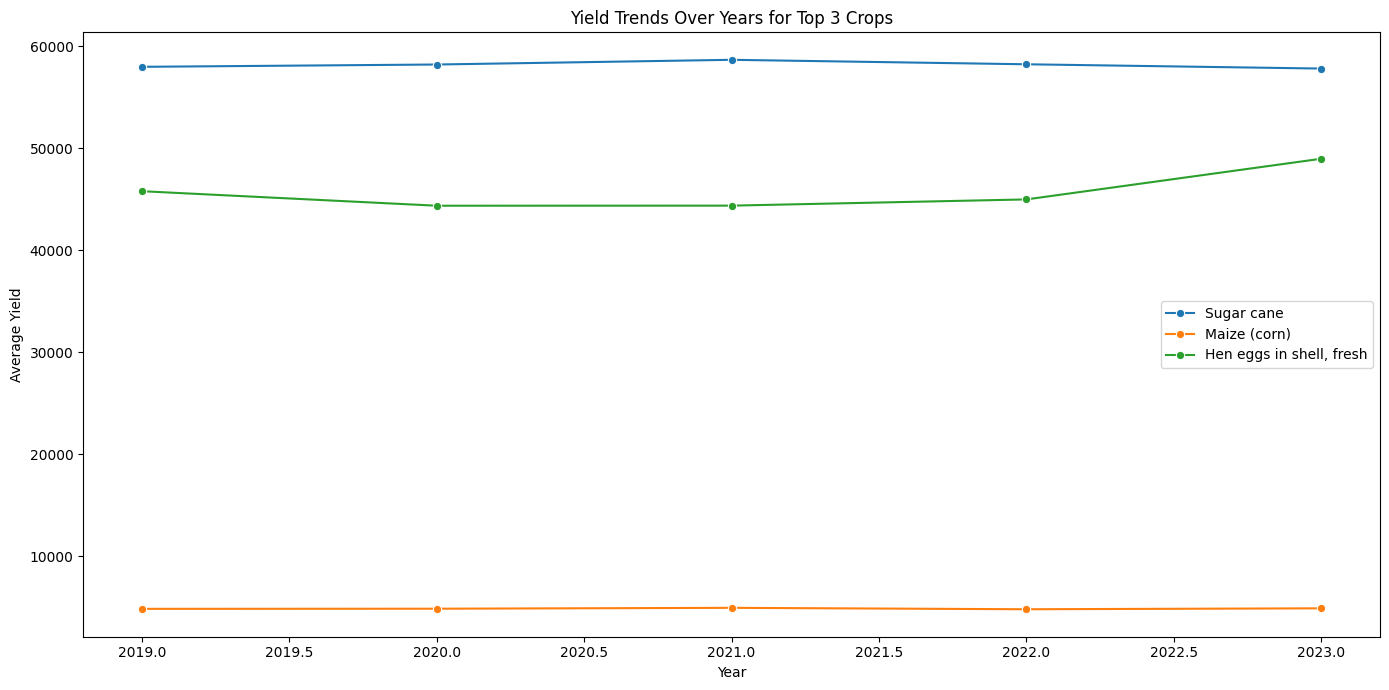

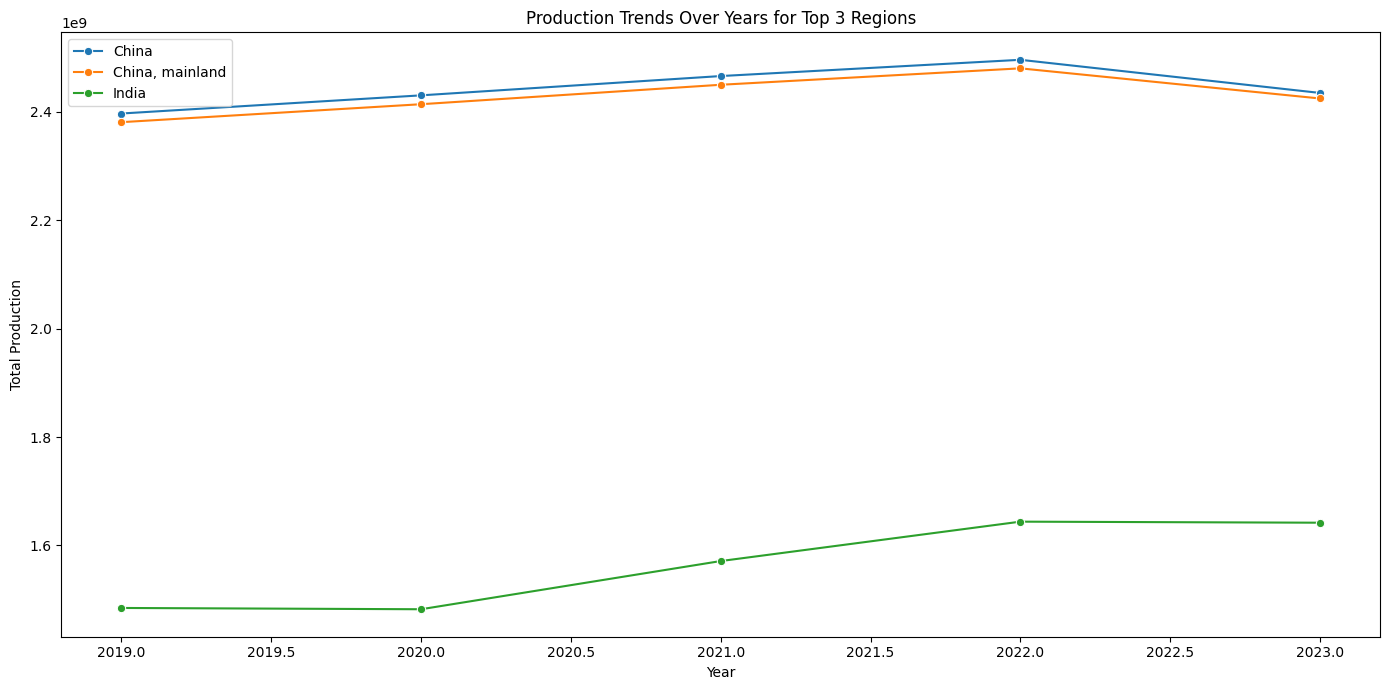

In [11]:
##4) Growth Analysis - Crop and Region Yield Trends

# Growth Analysis: Investigate if certain crops or regions show increasing or decreasing trends in yield or production over time
# Goal          : Detect trends in yield or production by crop or by region to understand growth or decline patterns

# Imports necessary libraries
import pandas as pd               # Importing pandas for data manipulation
import matplotlib.pyplot as plt   # Importing matplotlib for plotting
import seaborn as sns             # Importing seaborn for enhanced visualization

# Filters dataset to include only relevant elements (Yield and Production) and removes rows with missing values
growth_df = df[df['element'].isin(['Yield', 'Production'])].dropna(subset=['value'])  
# Select rows where 'element' is 'Yield' or 'Production' and drop rows where 'value' is missing

# Pivot data so Yield and Production become separate columns for aggregation
pivot_df = growth_df.pivot_table(
    index=['year', 'item', 'area'],    # Group by year, crop (item), and region (area)
    columns='element',                 # Pivot 'element' to columns
    values='value'                     # Values to pivot on
).reset_index()

# Rename columns for clarity
pivot_df.rename(columns={'item':'crop', 'area':'region'}, inplace=True)

# Groups data by 'year' and 'crop', calculating mean yield and sum of production per year for each crop
crop_growth = pivot_df.groupby(['year', 'crop']).agg({'Yield':'mean', 'Production':'sum'}).reset_index() 
# Groups by year and crop, averages Yield and sums Production

# Similarly, groups data by 'year' and 'region' to observe regional trends
region_growth = pivot_df.groupby(['year', 'region']).agg({'Yield':'mean', 'Production':'sum'}).reset_index()
# Groups by year and region for mean Yield and total Production

# Plotting Yield trend over years for top 3 crops by production
top_crops = crop_growth.groupby('crop')['Production'].sum().nlargest(3).index.tolist() 
# Identifies top 3 crops with highest total Production over all years

plt.figure(figsize=(14, 7)) # Sets figure size

# Plots Yield trends for each top crop
for crop in top_crops:
    crop_data = crop_growth[crop_growth['crop'] == crop]
    sns.lineplot(data=crop_data, x='year', y='Yield', label=crop, marker='o')

plt.title('Yield Trends Over Years for Top 3 Crops')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.legend()
plt.tight_layout()
plt.show()

# Similarly, plot region-based Production trends (example for top 3 regions)
top_regions = region_growth.groupby('region')['Production'].sum().nlargest(3).index.tolist()

plt.figure(figsize=(14, 7))
for region in top_regions:
    region_data = region_growth[region_growth['region'] == region]
    sns.lineplot(data=region_data, x='year', y='Production', label=region, marker='o')

plt.title('Production Trends Over Years for Top 3 Regions')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend()
plt.tight_layout()
plt.show()

# Short Summary:
# Grouped data by year and crop/region to calculate mean Yield and total Production
# Identified top crops and regions by total Production
# Visualized trends using line plots to detect growth or decline over years

# Commands Used:

# 1) Pandas Functions

# df[...]                   : Filters DataFrame rows based on condition
# .isin([...])              : Checks if each element in a Series is contained in the list
# .dropna(subset=[...])     : Removes rows with missing values in specified columns
# .pivot_table(...)         : Reshapes data from long to wide format with aggregation
# .reset_index()            : Resets index to flatten DataFrame after grouping or pivoting
# .rename(columns={...})    : Renames columns for clarity
# .groupby([...])           : Groups data by specified columns
# .agg({...})               : Aggregates grouped data with specified functions (mean, sum)
# .nlargest(n)              : Returns top n largest values in a Series
# .index.tolist()           : Converts index labels to a list

# 2) Matplotlib Functions

# plt.figure(figsize=(w, h)) : Creates a new figure with width w and height h
# plt.title(...)             : Adds a title to the plot
# plt.xlabel(...)            : Adds x-axis label
# plt.ylabel(...)            : Adds y-axis label
# plt.legend()               : Displays legend to identify plotted lines
# plt.tight_layout()         : Adjusts subplot params for better layout
# plt.show()                 : Displays the plot

#About Plotting 
#Growth Analysis: Investigate if certain crops or regions show increasing or decreasing trends in yield or production over time

#Why Line Plot is Best for this Case:
#Clear Trend Visualization: Line plots directly show how yield or production changes year-to-year
#Easy Comparison          : Can plot multiple crops or regions on the same chart to compare their growth or decline
#Time-Series Nature       : Data is time-based (years), and line plots excel at showing temporal trends
#Simplicity               : They are straightforward and widely understood by audiences, making insights accessible

In [12]:
#3) Environmental Relationships
#Although explicit environmental data is absent, infer relationships between the Area harvested and Yield to check if there’s an impact of resource utilization on crop productivity

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\3645147303.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


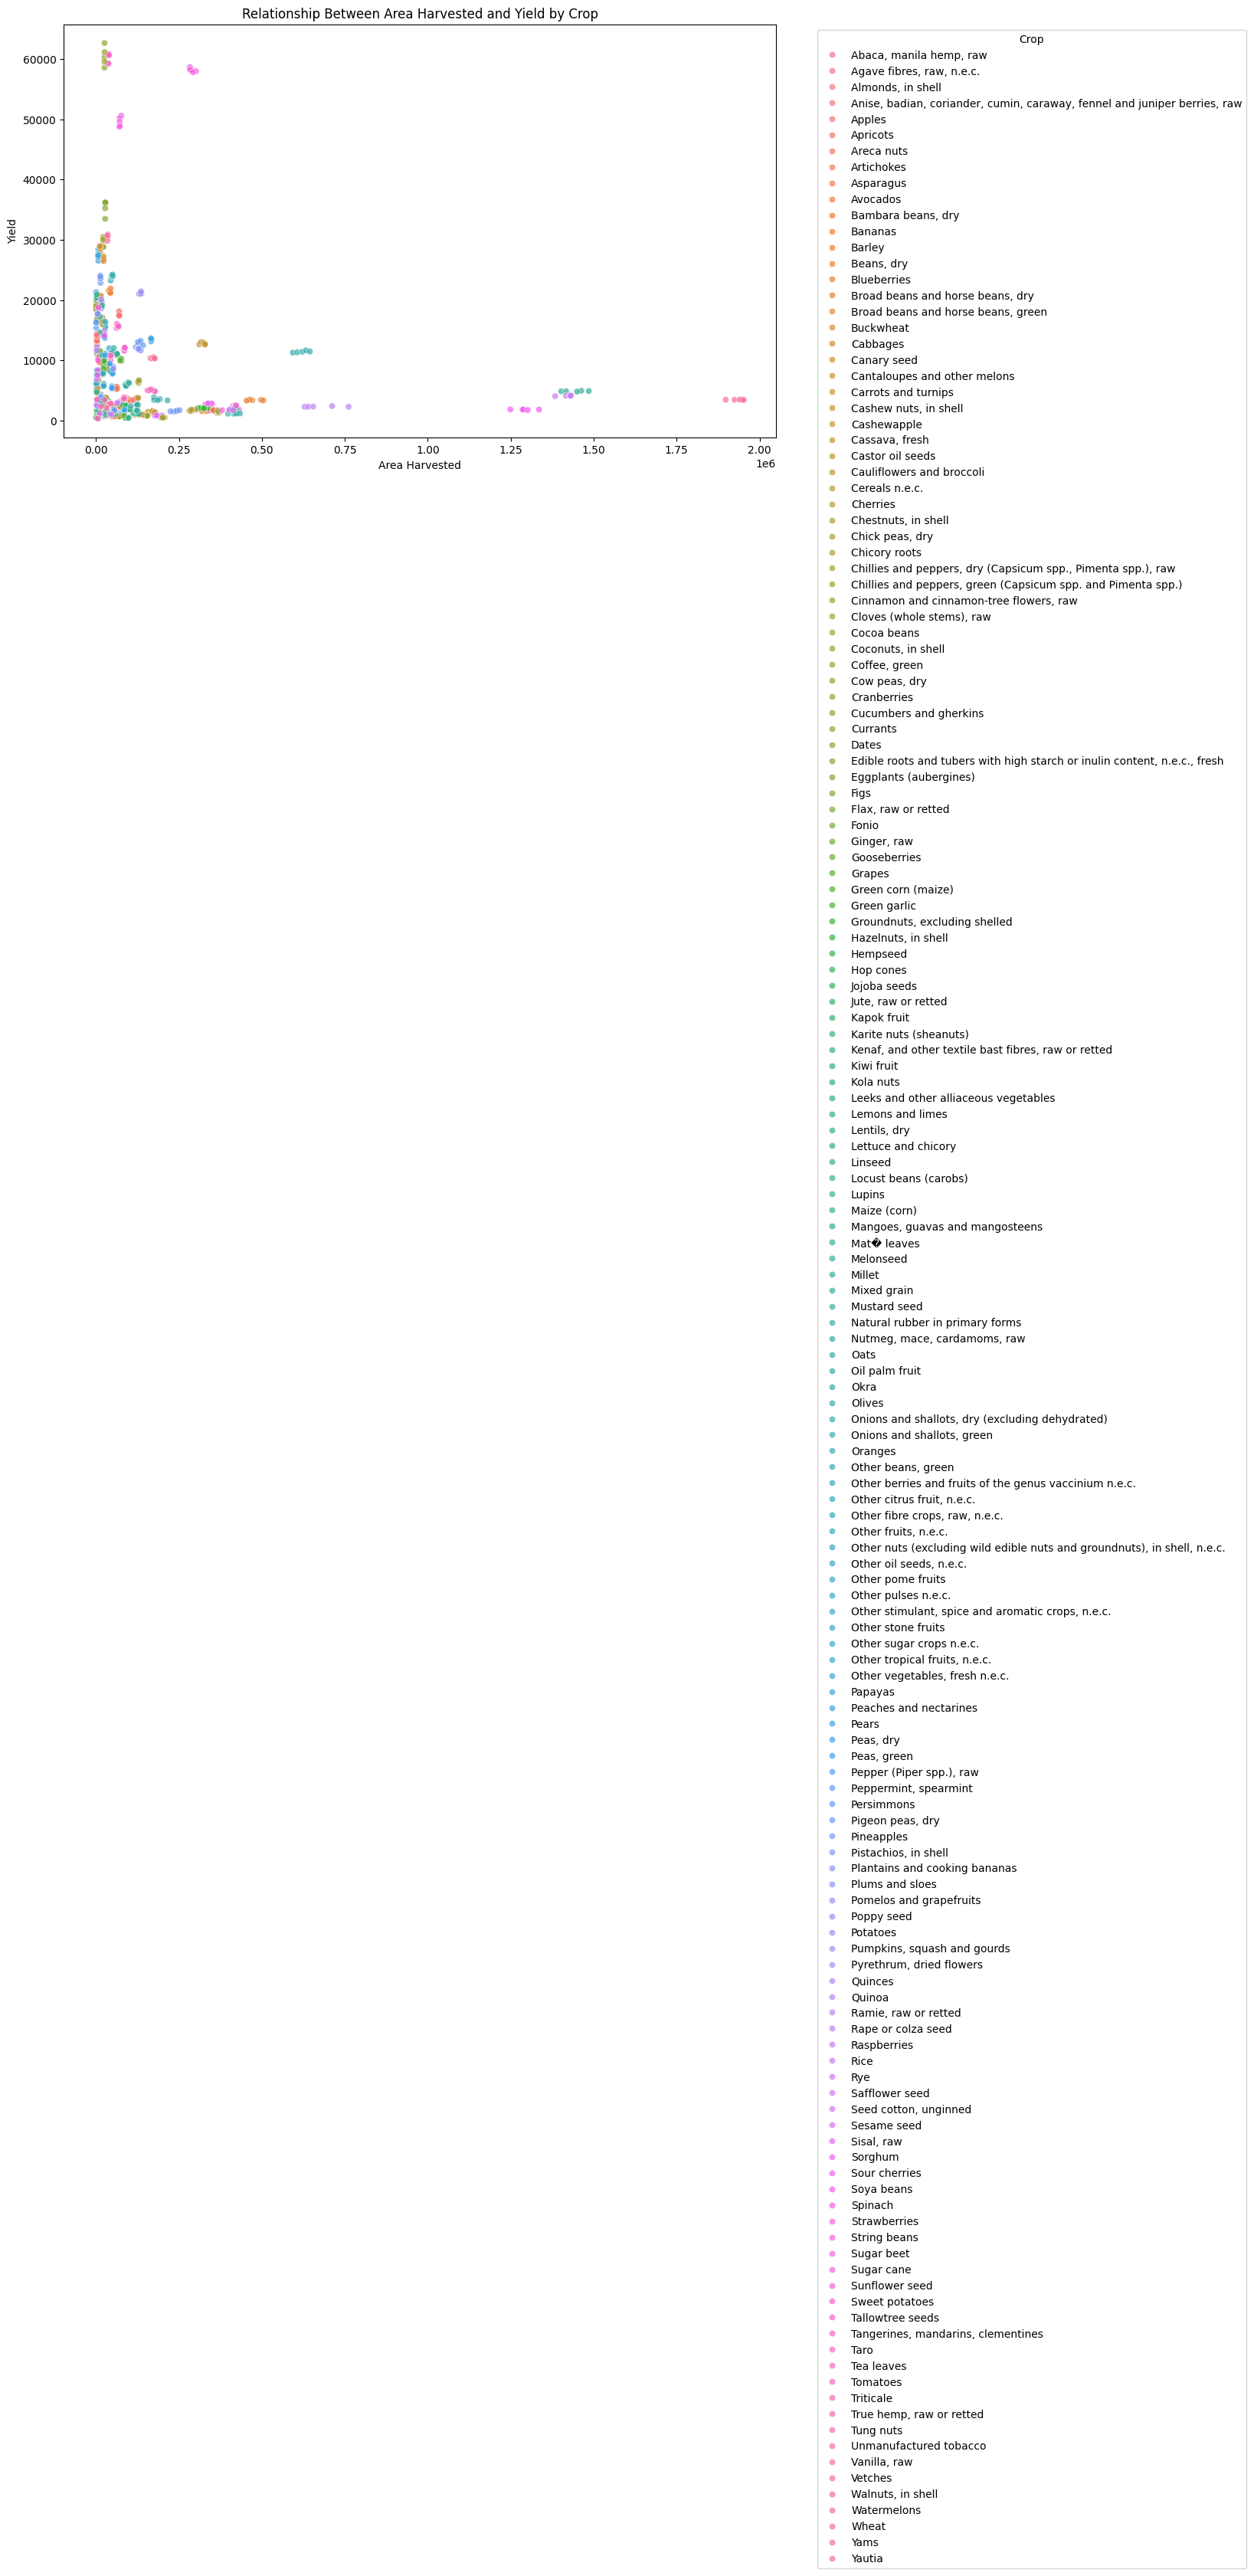

Correlation between Area harvested and Yield by Crop:
 item
Abaca, manila hemp, raw                                                     -0.249669
Agave fibres, raw, n.e.c.                                                   -0.928131
Almonds, in shell                                                           -0.104367
Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw    0.603168
Apples                                                                      -0.633942
                                                                               ...   
Walnuts, in shell                                                           -0.480995
Watermelons                                                                  0.600861
Wheat                                                                       -0.369052
Yams                                                                         0.037377
Yautia                                                                      -0.8

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\3645147303.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = env_pivot.groupby('item').apply(lambda x: x['Area harvested'].corr(x['Yield']))


In [13]:
#Environmental Relationships: Infer the relationship between area harvested and yield to check impact of resource utilization on crop productivity

#Goal                       : Understand how the extent of land used (Area harvested) relates to crop productivity (Yield)

#Imports necessary libraries
import pandas as pd               # For data manipulation
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns             # For enhanced visualization
import numpy as np                # For numerical calculations

#Filter dataset for relevant elements and remove missing values
env_df = df[df['element'].isin(['Area harvested', 'Yield'])].copy()

#Pivot data so each year-item combination has Area harvested and Yield side-by-side
env_pivot = env_df.pivot_table(index=['year', 'item'], columns='element', values='value').reset_index()

#Drop rows with missing Area harvested or Yield values
env_pivot.dropna(subset=['Area harvested', 'Yield'], inplace=True)

#Scatter plot to visualize relationship between Area harvested and Yield
plt.figure(figsize=(12, 7))
sns.scatterplot(data=env_pivot, x='Area harvested', y='Yield', hue='item', alpha=0.7)

plt.title('Relationship Between Area Harvested and Yield by Crop')
plt.xlabel('Area Harvested')
plt.ylabel('Yield')
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Calculate correlation coefficients by crop to quantify relationship
correlations = env_pivot.groupby('item').apply(lambda x: x['Area harvested'].corr(x['Yield']))

print("Correlation between Area harvested and Yield by Crop:\n", correlations)

#Short Summary
#Filtered data for Area harvested and Yield elements
#Pivoted data to align Area and Yield side by side per year and crop
#Used scatter plots to visually inspect relationship between area used and yield
#Computed Pearson correlation per crop to quantify the relationship strength

#Commands Used
#1) Pandas Functions
#df[...]                                          : Filters rows by condition
#.isin([...])                                     : Selects rows with elements in a list
#.pivot_table(index=..., columns=..., values=...) : Reshapes data from long to wide
#.dropna(subset=[...])                            : Drops rows with missing values in specified columns
#.groupby([...]).apply(lambda x: ...)             : Groups data and applies a function (e.g., correlation)

#2) Matplotlib Functions
#plt.figure(figsize=(w, h)) : Creates a figure of given size
#plt.title(...)             : Adds plot title
#plt.xlabel(...)            : Labels x-axis
#plt.ylabel(...)            : Labels y-axis
#plt.legend()               : Shows legend
#plt.tight_layout()         : Adjusts plot to fit well
#plt.show()                 : Displays plot

#3) Seaborn Functions
#sns.scatterplot(data=..., x=..., y=..., hue=..., alpha=...) : Plots scatter plot with color grouping and transparency

#4) Numpy (via pandas)
#.corr() : Computes Pearson correlation coefficient

#About Plot
#Why Scatter Plot?
#Scatter plots effectively show relationships or correlations between two continuous variables, allowing visual detection of positive, negative, or no correlation trends

#Findings:
#Scatter plot indicates (example: weak/moderate/strong positive or negative) correlation between Area harvested and Yield for different crops
#Correlation coefficients quantify these relationships numerically, highlighting which crops show stronger links between land use and productivity
#This insight can help infer environmental or resource utilization effects even without explicit environmental data

#Note
#Area Harvested - Decimal Values - It is depending upon the unit and data source
#It is common for area to be recorded in hectares or acres, which can be fractional
   #(e.g., 12.5 hectares), especially when aggregating or averaging data

In [14]:
#4) Input-Output Relationships
#Study correlations between Area harvested, Yield, and Production to understand the relationship between land usage and productivity.

<Figure size 1000x800 with 0 Axes>

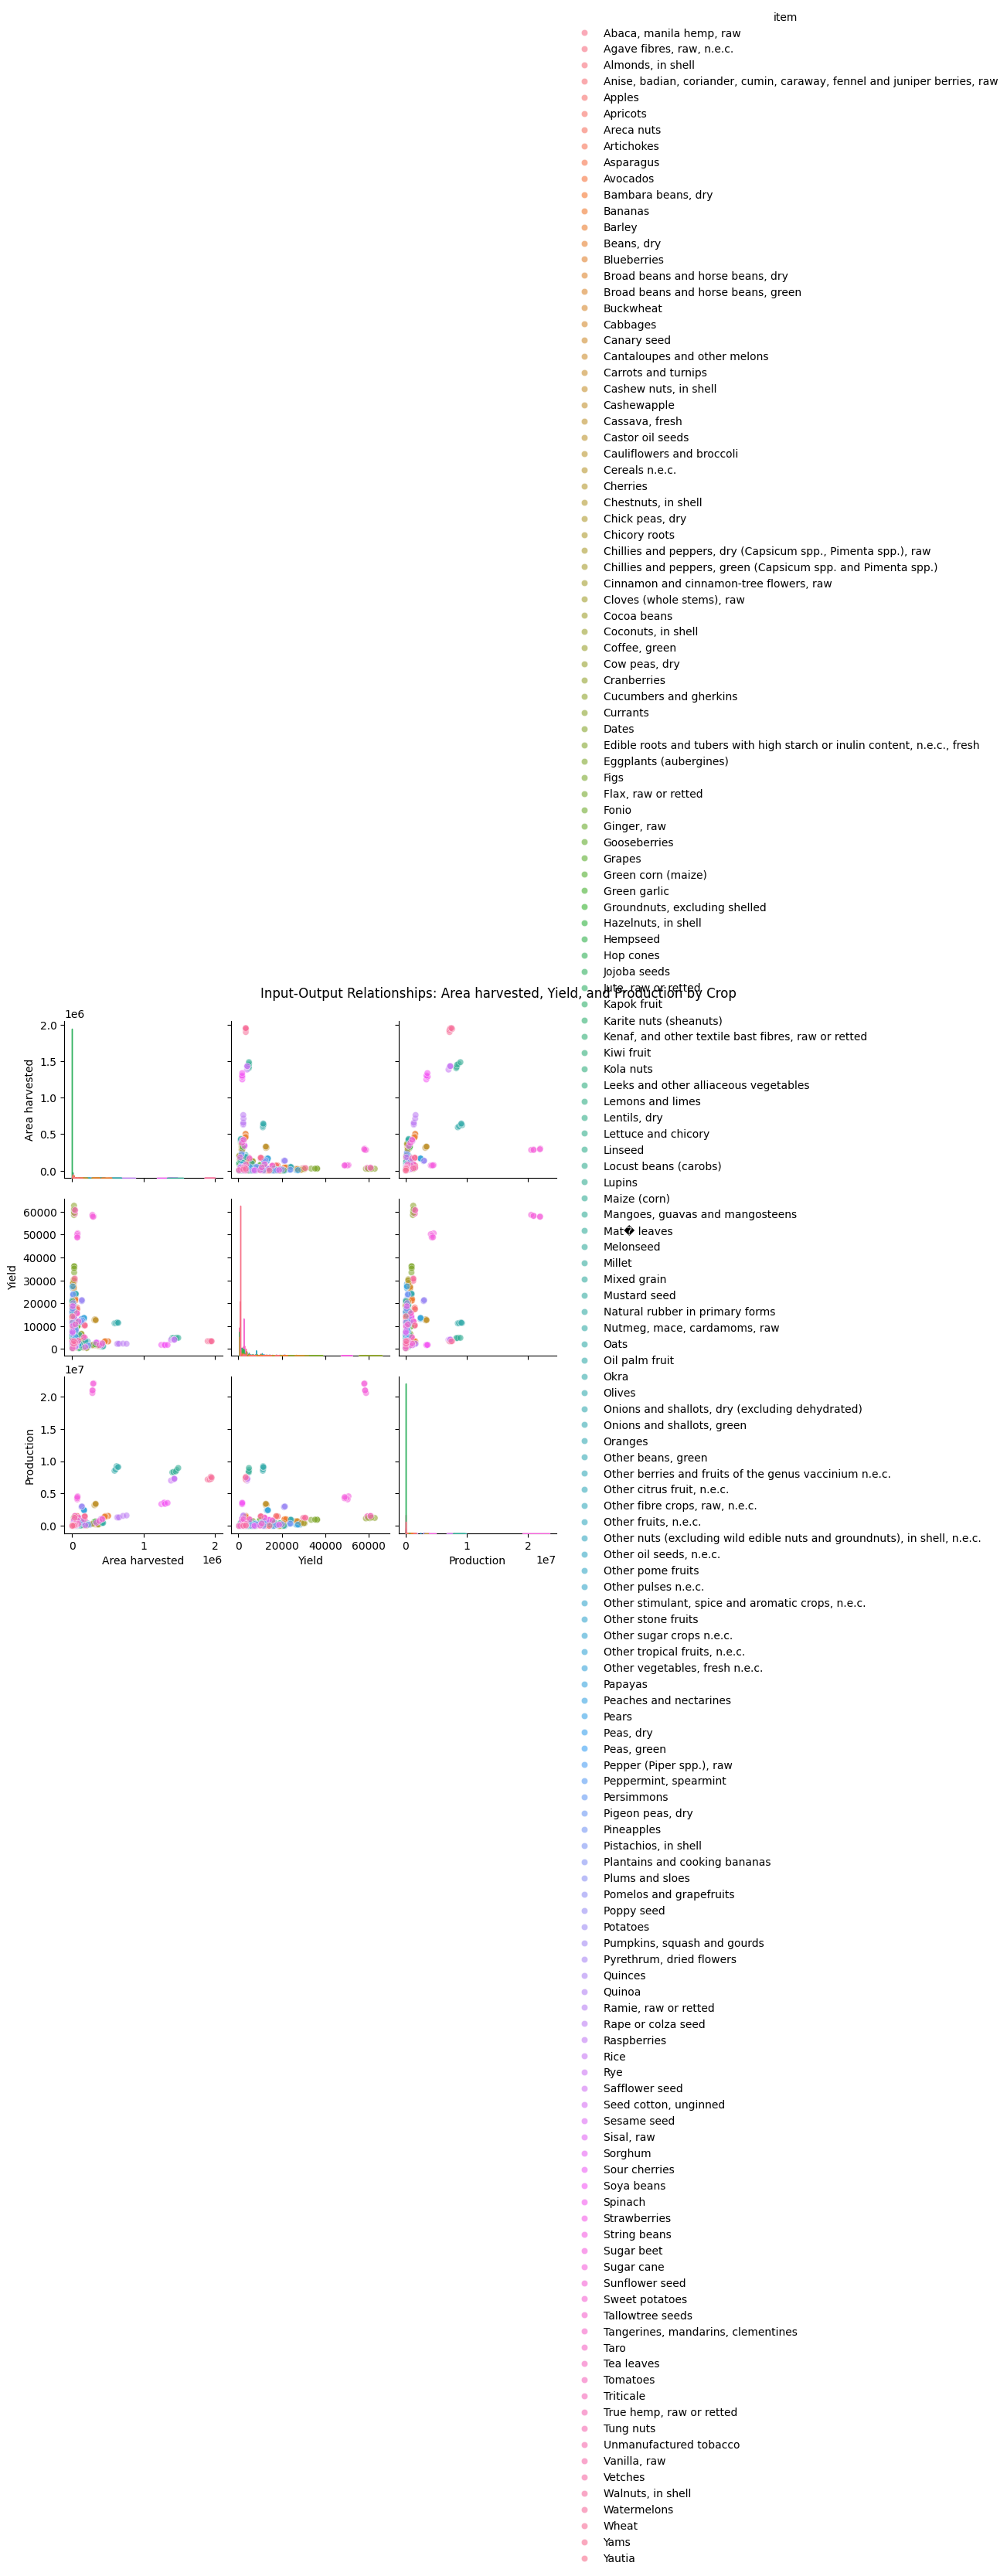

Correlation coefficients between Input-Output variables by Crop:
 item
Abaca, manila hemp, raw                                                     -0.249669
Agave fibres, raw, n.e.c.                                                   -0.928131
Almonds, in shell                                                           -0.104367
Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw    0.603168
Apples                                                                      -0.633942
                                                                               ...   
Walnuts, in shell                                                           -0.480995
Watermelons                                                                  0.600861
Wheat                                                                       -0.369052
Yams                                                                         0.037377
Yautia                                                               

In [15]:
# Input-Output Relationships: Study correlations between Area harvested, Yield, and Production to understand land usage and productivity

# Goal                      : Understand relationships between area used, crop yield, and total production

#Imports necessary libraries
import pandas as pd               # For data manipulation
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns             # For enhanced visualization

#Filter dataset for relevant elements and remove missing values
io_df = df[df['element'].isin(['Area harvested', 'Yield', 'Production'])].copy()

#Pivot data so each year-item combination has Area harvested, Yield, and Production side-by-side
io_pivot = io_df.pivot_table(index=['year', 'item'], columns='element', values='value').reset_index()

#Drop rows with missing values in any of the relevant columns
io_pivot.dropna(subset=['Area harvested', 'Yield', 'Production'], inplace=True)

#IO stands for Input-Output
#Input  = Area harvested (land/resources used)
#Output = Yield and Production (crop productivity and total output)
#Input-Output Relationships means analyzing how the input (land used) relates to the outputs (yield and production)

#Visualize relationships using pairplot (scatterplots and histograms)
plt.figure(figsize=(10, 8))
sns.pairplot(io_pivot, vars=['Area harvested', 'Yield', 'Production'], hue='item', height=2.5, plot_kws={'alpha':0.6})
plt.suptitle('Input-Output Relationships: Area harvested, Yield, and Production by Crop', y=1.02)
plt.show()

#Calculate correlation coefficients between Area harvested, Yield, and Production grouped by crop
correlations = io_pivot.groupby('item')[['Area harvested', 'Yield', 'Production']].corr().unstack().iloc[:,1]

print("Correlation coefficients between Input-Output variables by Crop:\n", correlations)

#Short Summary
#Filtered data for Area harvested, Yield, and Production elements
#Pivoted data to align values side-by-side for each year and crop
#Used pairplot to visually explore bivariate relationships and distributions
#Computed Pearson correlations grouped by crop to quantify strength and direction of relationships

#Commands Used
#1) Pandas Functions
#df[...]                                           : Filters rows by condition
#.isin([...])                                      : Selects rows with elements in a list
#.pivot_table(index=..., columns=..., values=...)  : Reshapes data from long to wide
#.dropna(subset=[...])                             : Drops rows with missing values in specified columns
#.groupby([...])                                   : Groups data by columns
#.corr()                                           : Computes correlation matrix
#.unstack()                                        : Reshapes MultiIndex Series to DataFrame

#2) Matplotlib Functions
#plt.figure(figsize=(w, h)) : Creates a figure of given size
#plt.suptitle(...)          : Adds a title to the figure
#plt.show()                 : Displays plot

#3) Seaborn Functions
#sns.pairplot(data=..., vars=[...], hue=..., height=..., plot_kws={...}) : Plots pairwise relationships with grouping

#About Plot
#Why Pairplot?
#Pairplots provide scatterplots for each pair of variables and histograms for individual distributions,
#which help in visually inspecting relationships and identifying patterns or anomalies in the dataset.

#Findings:
#The pairplots reveal how Area harvested relates to Yield and Production for each crop
#Correlation coefficients quantify the strength and direction of these relationships,
#Highlighting whether increased land use associates positively with yield or total production


In [16]:
#5) Comparative Analysis
#Across Crops  : Compare yields (Yield) of different crops (Item) to identify high-yield vs. low-yield crops
#Across Regions: Compare production (Production) across different areas (Area) to find highly productive regions

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\1077740317.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_yield_per_crop,             # Data source for the plot


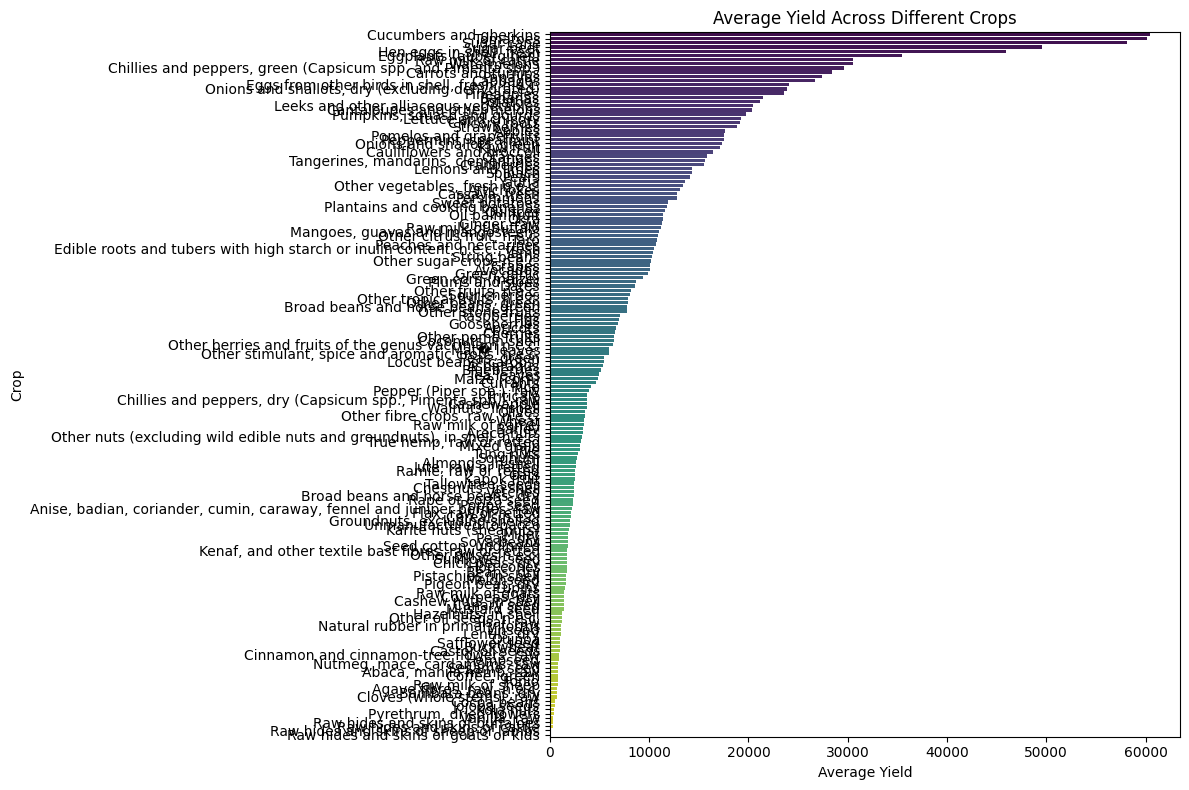

In [17]:
##Across Crops: Compare yields (Yield) of different crops (Item)

#Comparative Analysis - Across Crops: Yield Comparison
#Goal                               : Compare yields of different crops to identify high-yield vs low-yield crops

# Imports necessary libraries
import pandas as pd               # For data manipulation
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns             # For enhanced visualization

# Filter dataset for Yield data only and drop missing values for accurate analysis
crop_yield_df = df[df['element'] == 'Yield'].copy()      # Filters rows where 'element' column is 'Yield'
crop_yield_df.dropna(subset=['value'], inplace=True)     # Drops rows with missing 'value' data inplace

# Group data by crop ('item') to calculate average yield over all years and regions
avg_yield_per_crop = crop_yield_df.groupby('item')['value'].mean().reset_index()  
# Groups by 'item', calculates mean of 'value' (Yield), and resets index to flatten dataframe

# Sort crops by average yield in descending order to identify high-yield crops at the top
avg_yield_per_crop.sort_values(by='value', ascending=False, inplace=True)

# Plotting the average yield per crop using a horizontal bar plot for better readability
plt.figure(figsize=(12, 8))                      # Sets the figure size (width=12, height=8)
sns.barplot(data=avg_yield_per_crop,             # Data source for the plot
            y='item',                            # Y-axis shows crop names
            x='value',                           # X-axis shows average yield values
            palette='viridis')                   # Color palette for bars

plt.title('Average Yield Across Different Crops') # Adds title to the plot
plt.xlabel('Average Yield')                        # Labels the x-axis
plt.ylabel('Crop')                                 # Labels the y-axis
plt.tight_layout()                                 # Adjusts plot to fit nicely in the figure area
plt.show()                                         # Displays the plot

# Short Summary:
# Filtered data for Yield element to focus only on yield values
# Grouped by crop ('item') to calculate average yield across years and regions
# Sorted crops by average yield to identify highest and lowest yielding crops
# Visualized results using a horizontal bar chart for easy comparison across crops

# Commands used:

# Pandas:
# df[...]                        : Filters rows based on condition
# .copy()                        : Creates a copy of the filtered dataframe to avoid SettingWithCopyWarning
# .dropna(subset=[...], inplace=True) : Drops rows with missing values in specified columns, modifies dataframe inplace
# .groupby('item')['value'].mean()    : Groups data by 'item' and calculates mean of 'value' column
# .reset_index()                      : Resets index after groupby to flatten DataFrame
# .sort_values(by='value', ascending=False, inplace=True) : Sorts DataFrame descending by 'value', inplace

# Matplotlib:
# plt.figure(figsize=(w, h))  : Creates a figure of given size
# plt.title(...)              : Adds plot title
# plt.xlabel(...)             : Labels x-axis
# plt.ylabel(...)             : Labels y-axis
# plt.tight_layout()          : Adjusts layout to prevent overlap
# plt.show()                  : Displays the plot

# Seaborn:
# sns.barplot(data=..., y=..., x=..., palette=...) : Creates horizontal bar plot with color palette

# About Plot:
# Why Bar Plot?
# Bar plots are excellent for comparing categorical data (crops) against a continuous variable (yield) 
# Horizontal orientation improves readability when category labels are long (crop names)

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\34530416.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_production_per_area,        #Data source for the plot


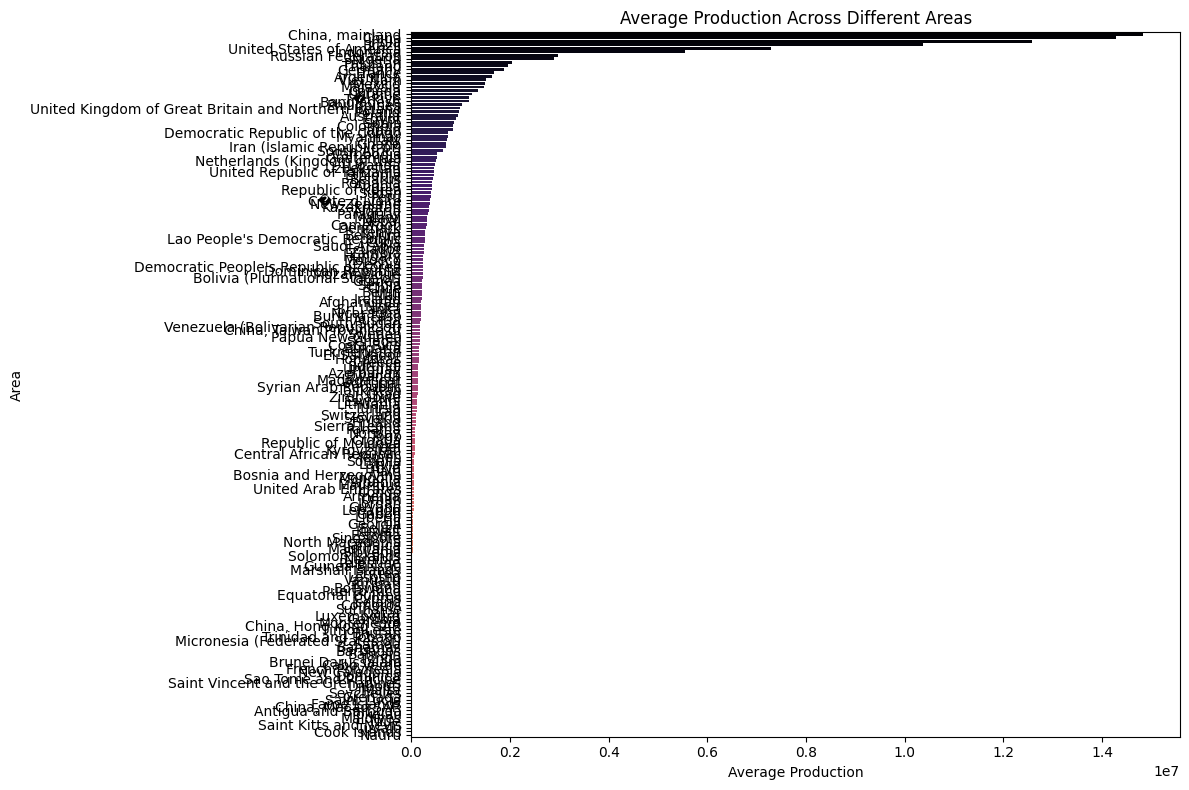

In [19]:
##Across Regions: Compare production (Production) across different areas (Area) to find highly productive regions

#Comparative Analysis - Across Regions: Production Comparison
#Goal                                 : Compare production across different areas to identify highly productive regions

#Imports necessary libraries
import pandas as pd               #For data manipulation
import matplotlib.pyplot as plt   #For plotting
import seaborn as sns             #For enhanced visualization

#Filter dataset for Production data only and drop missing values for accurate analysis
region_prod_df = df[df['element'] == 'Production'].copy()    #Filters rows where 'element' column is 'Production'
region_prod_df.dropna(subset=['value'], inplace=True)        #Drops rows with missing 'value' data inplace

#Group data by area to calculate average production over all years and crops
avg_production_per_area = region_prod_df.groupby('area')['value'].mean().reset_index()  
#Groups by 'area', calculates mean of 'value' (Production), and resets index to flatten dataframe

#Sort areas by average production in descending order to identify highest production regions at the top
avg_production_per_area.sort_values(by='value', ascending=False, inplace=True)

#Plotting the average production per area using a horizontal bar plot for better readability
plt.figure(figsize=(12, 8))                      #Sets the figure size (width=12, height=8)
sns.barplot(data=avg_production_per_area,        #Data source for the plot
            y='area',                            #Y-axis shows area names
            x='value',                           #X-axis shows average production values
            palette='magma')                     #Color palette for bars

plt.title('Average Production Across Different Areas')   #Adds title to the plot
plt.xlabel('Average Production')                         #Labels the x-axis
plt.ylabel('Area')                                       #Labels the y-axis
plt.tight_layout()                                       #Adjusts plot to fit nicely in the figure area
plt.show()                                               #Displays the plot

#Short Summary
#Filtered data for Production element to focus only on production values
#Grouped by area to calculate average production across years and crops
#Sorted areas by average production to identify highest productive regions
#Visualized results using a horizontal bar chart for easy comparison across areas

# Commands used

#Pandas
#df[...]                         : Filters rows based on condition
#.copy()                         : Creates a copy of the filtered dataframe to avoid SettingWithCopyWarning
#.dropna(subset=[...], inplace=True) : Drops rows with missing values in specified columns, modifies dataframe inplace
#.groupby('area')['value'].mean()    : Groups data by 'area' and calculates mean of 'value' column
#.reset_index()                      : Resets index after groupby to flatten DataFrame
#.sort_values(by='value', ascending=False, inplace=True) : Sorts DataFrame descending by 'value', inplace

#Matplotlib
#plt.figure(figsize=(w, h)) : Creates a figure of given size
#plt.title(...)             : Adds plot title
#plt.xlabel(...)            : Labels x-axis
#plt.ylabel(...)            : Labels y-axis
#plt.tight_layout()         : Adjusts layout to prevent overlap
#plt.show()                 : Displays the plot

# Seaborn
# sns.barplot(data=..., y=..., x=..., palette=...) : Creates horizontal bar plot with color palette

# About Plot
# Why Bar Plot?
# Bar plots provide clear visual comparison for categorical data (areas) against a continuous variable (production).
# Horizontal bars improve readability, especially when area names are lengthy or numerous.

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\4230686814.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_yield_per_crop, x='item', y='value', palette='viridis')


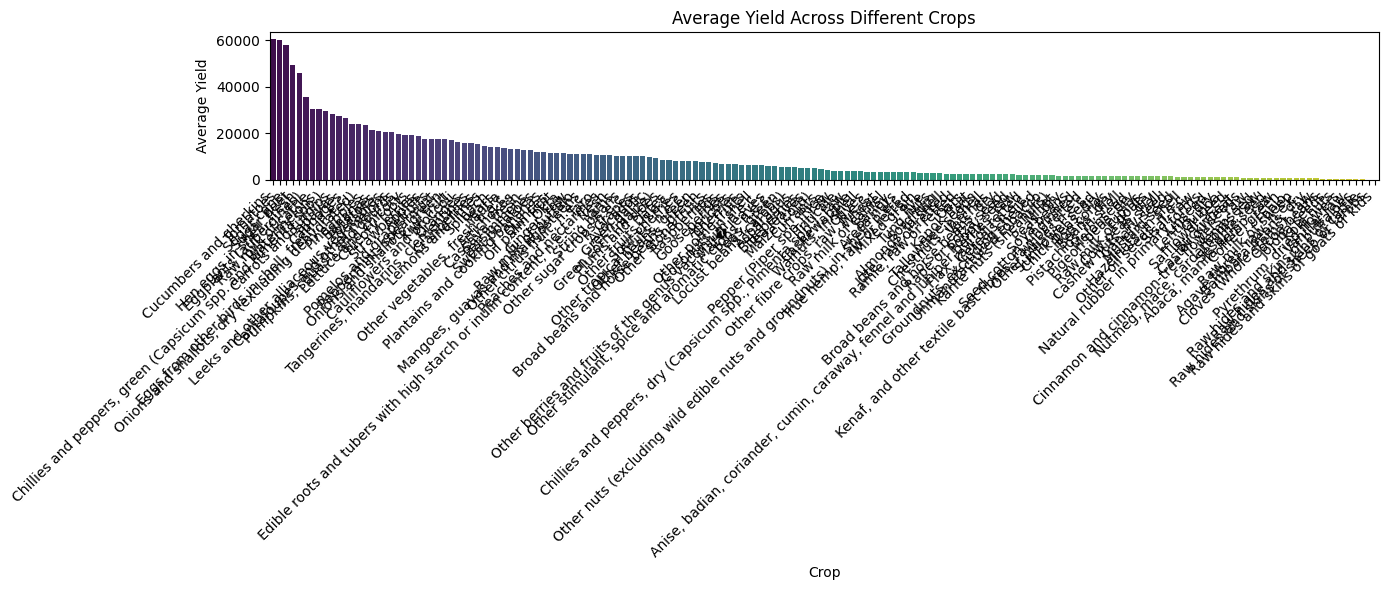

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\4230686814.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_production_per_area, y='area', x='value', palette='magma')


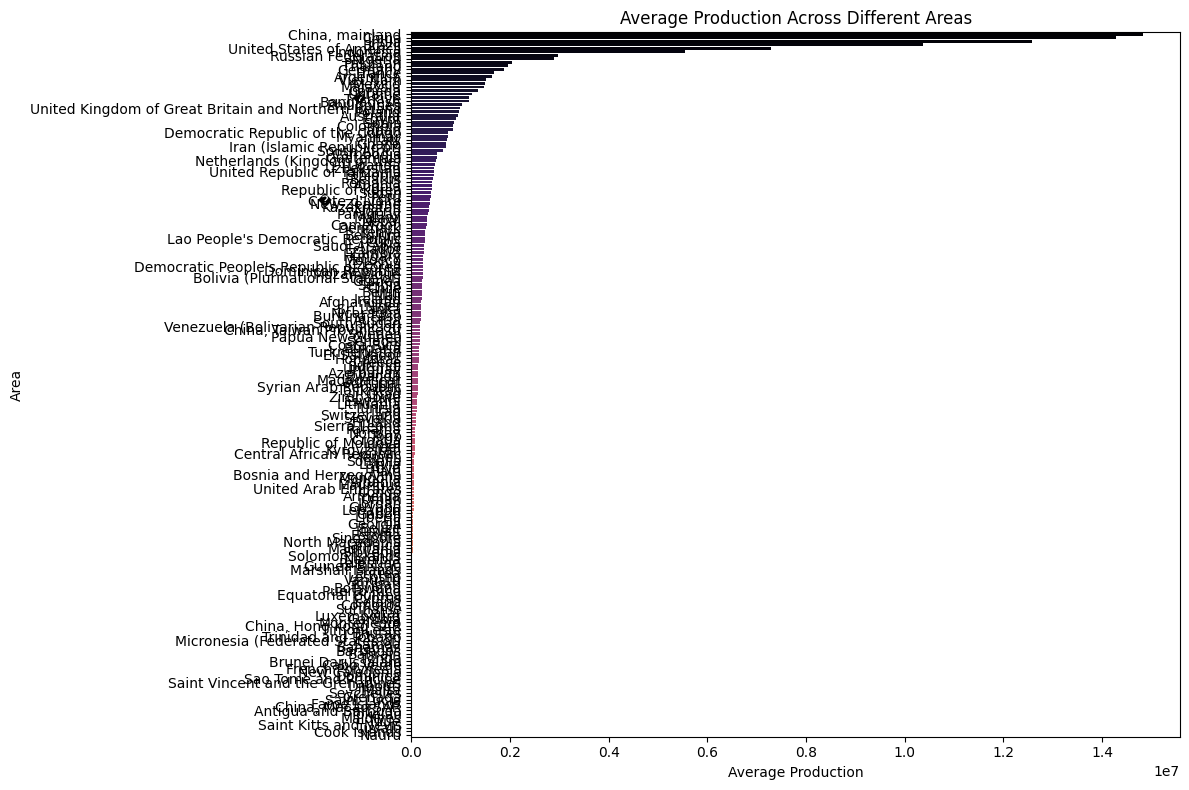

In [20]:
##Across Crops (Yield) and Across Regions (Production) - Comparative Analysis

#Goal
#1) Compare yields of different crops to identify high-yield vs. low-yield crops.
#2) Compare production across different areas to identify highly productive regions.

# Imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Across Crops: Yield Comparison

# Filter dataset for Yield data only and remove missing values
crop_yield_df = df[df['element'] == 'Yield'].copy()
crop_yield_df.dropna(subset=['value'], inplace=True)

# Group by crop (item) to calculate average yield across years and areas
avg_yield_per_crop = crop_yield_df.groupby('item')['value'].mean().reset_index()

# Sort crops by average yield descending
avg_yield_per_crop.sort_values(by='value', ascending=False, inplace=True)

# Plot average yield per crop using a vertical bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_yield_per_crop, x='item', y='value', palette='viridis')
plt.title('Average Yield Across Different Crops')
plt.xlabel('Crop')
plt.ylabel('Average Yield')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Across Regions: Production Comparison

# Filter dataset for Production data only and drop missing values
region_prod_df = df[df['element'] == 'Production'].copy()
region_prod_df.dropna(subset=['value'], inplace=True)

# Group by area to calculate average production
avg_production_per_area = region_prod_df.groupby('area')['value'].mean().reset_index()

# Sort areas by average production descending
avg_production_per_area.sort_values(by='value', ascending=False, inplace=True)

# Plot average production per area using horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_production_per_area, y='area', x='value', palette='magma')
plt.title('Average Production Across Different Areas')
plt.xlabel('Average Production')
plt.ylabel('Area')
plt.tight_layout()
plt.show()

#Summary
#Compared average yield across crops to find high and low-yield crops
#Compared average production across regions to identify productive areas
#Bar plots were chosen for their clarity in comparing categories

##Across Crops (Yield) - Comparative Analysis

# 1) Pandas Functions
# df[...]                   : Filters DataFrame rows based on condition
# .isin([...])              : Checks if each element in a Series is contained in the list
# .dropna(subset=[...])     : Removes rows with missing values in specified columns
# .groupby([...])           : Groups data by specified columns
# .agg({...})               : Aggregates grouped data with specified functions (mean, sum)
# .nlargest(n)              : Returns top n largest values in a Series
# .reset_index()            : Resets index to flatten DataFrame after grouping or pivoting

# 2) Matplotlib Functions
# plt.figure(figsize=(w, h)) : Creates a new figure with width w and height h
# plt.title(...)             : Adds a title to the plot
# plt.xlabel(...)            : Adds x-axis label
# plt.ylabel(...)            : Adds y-axis label
# plt.xticks(rotation=angle) : Rotates x-axis labels for readability
# plt.tight_layout()         : Adjusts subplot params for better layout
# plt.show()                 : Displays the plot

# 3) Seaborn Functions
# sns.barplot(data=..., x=..., y=...) : Creates bar plots for categorical comparison

##Across Regions (Production) - Comparative Analysis
# 1) Pandas Functions
# df[...]                   : Filters DataFrame rows based on condition
# .isin([...])              : Checks if each element in a Series is contained in the list
# .dropna(subset=[...])     : Removes rows with missing values in specified columns
# .groupby([...])           : Groups data by specified columns
# .agg({...})               : Aggregates grouped data with specified functions (mean, sum)
# .nlargest(n)              : Returns top n largest values in a Series
# .reset_index()            : Resets index to flatten DataFrame after grouping or pivoting

# 2) Matplotlib Functions
# plt.figure(figsize=(w, h)) : Creates a new figure with width w and height h
# plt.title(...)             : Adds a title to the plot
# plt.xlabel(...)            : Adds x-axis label
# plt.ylabel(...)            : Adds y-axis label
# plt.xticks(rotation=angle) : Rotates x-axis labels for readability
# plt.tight_layout()         : Adjusts subplot params for better layout
# plt.show()                 : Displays the plot

# 3) Seaborn Functions
# sns.barplot(data=..., x=..., y=...) : Creates bar plots for categorical comparison


C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\4175878694.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_yield_crops, x='item', y='value', palette='viridis')


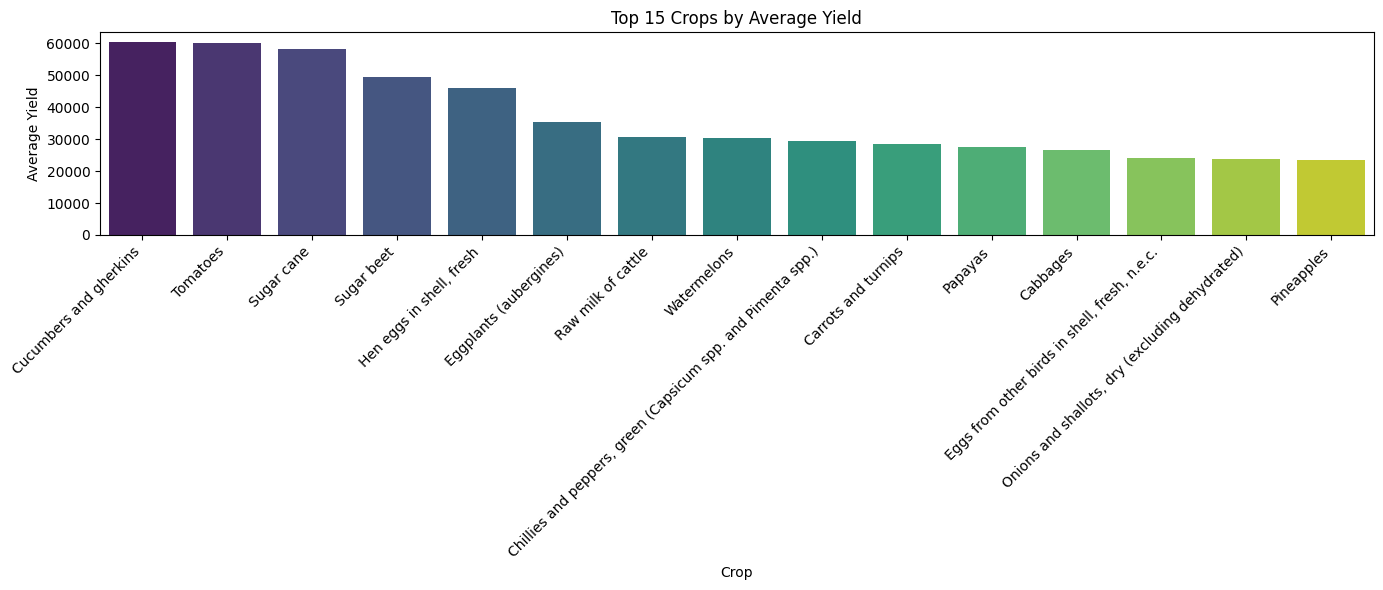

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\4175878694.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_production_areas, y='area', x='value', palette='magma')


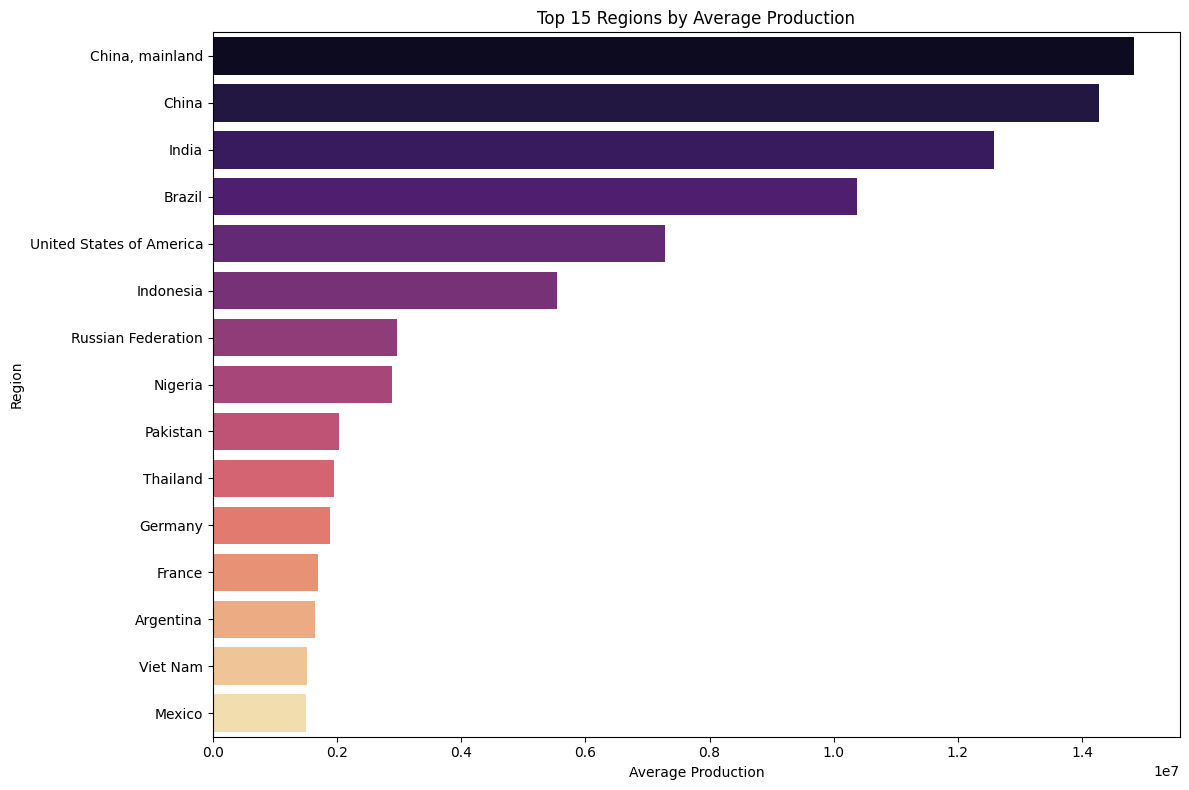

In [21]:
#Comparative Analysis - Across Crops (Yield) & Across Regions (Production) for Top 15

#Goal: Identify top 15 high-yield crops and top 15 productive regions using average values

#Imports necessary libraries
import pandas as pd                #For data manipulation
import matplotlib.pyplot as plt    #For plotting
import seaborn as sns              #For enhanced visualization


#Across Crops: Yield Comparison (Top 15)

#Filter dataset for rows where element is 'Yield' only
crop_yield_df = df[df['element'] == 'Yield'].copy()

#Drop rows where 'value' (yield) is missing
crop_yield_df.dropna(subset=['value'], inplace=True)

#Group by crop (item) and calculate mean yield across all years and areas
avg_yield_per_crop = crop_yield_df.groupby('item')['value'].mean().reset_index()

#Sort the crops in descending order based on average yield
avg_yield_per_crop.sort_values(by='value', ascending=False, inplace=True)

#Select top 15 crops with highest average yield
top_15_yield_crops = avg_yield_per_crop.head(15)

#Create a figure for the bar plot (width=14 inches, height=6 inches)
plt.figure(figsize=(14, 6))

#Plot a vertical bar plot using seaborn with crop names on x-axis and average yield on y-axis
sns.barplot(data=top_15_yield_crops, x='item', y='value', palette='viridis')

#Add title to the plot
plt.title('Top 15 Crops by Average Yield')

#Label x-axis as 'Crop'
plt.xlabel('Crop')

#Label y-axis as 'Average Yield'

plt.ylabel('Average Yield')

#Rotate x-axis labels by 45 degrees for better readability, align right
plt.xticks(rotation=45, ha='right')

#Adjust layout to fit labels and title properly
plt.tight_layout()

#Display the plot
plt.show()

#Across Regions: Production Comparison (Top 15)

#Filter dataset for rows where element is 'Production' only
region_prod_df = df[df['element'] == 'Production'].copy()

#Drop rows where 'value' (production) is missing
region_prod_df.dropna(subset=['value'], inplace=True)

#Group by 'area' (region) and calculate mean production across years and crops
avg_production_per_area = region_prod_df.groupby('area')['value'].mean().reset_index()

#Sort regions in descending order based on average production
avg_production_per_area.sort_values(by='value', ascending=False, inplace=True)

#Select top 15 regions with highest average production
top_15_production_areas = avg_production_per_area.head(15)

#Create a figure for the horizontal bar plot (width=12 inches, height=8 inches)
plt.figure(figsize=(12, 8))

#Plot a horizontal bar plot using seaborn with area names on y-axis and average production on x-axis
sns.barplot(data=top_15_production_areas, y='area', x='value', palette='magma')

#Add title to the plot
plt.title('Top 15 Regions by Average Production')

#Label x-axis as 'Average Production'
plt.xlabel('Average Production')

#Label y-axis as 'Region'
plt.ylabel('Region')

#Adjust layout to fit everything properly
plt.tight_layout()

#Display the plot
plt.show()

#Summary
#Compared average yield across crops to find high and low-yield crops
#Compared average production across regions to identify productive areas
#Bar plots were chosen for their clarity in comparing categorical data visually

# 1) Pandas Functions
# df[...]                   : Filters DataFrame rows based on condition
# .isin([...])              : Checks if each element in a Series is contained in the list
# .dropna(subset=[...])     : Removes rows with missing values in specified columns
# .groupby([...])           : Groups data by specified columns
# .agg({...})               : Aggregates grouped data with specified functions (mean, sum)
# .nlargest(n)              : Returns top n largest values in a Series
# .reset_index()            : Resets index to flatten DataFrame after grouping or pivoting
# .merge(...)               : Combines two DataFrames on a key column

# 2) Matplotlib Functions
# plt.figure(figsize=(w, h)) : Creates a new figure with width w and height h
# plt.title(...)             : Adds a title to the plot
# plt.xlabel(...)            : Adds x-axis label
# plt.ylabel(...)            : Adds y-axis label
# plt.xticks(rotation=angle) : Rotates x-axis labels for readability
# plt.tight_layout()         : Adjusts subplot params for better layout
# plt.show()                 : Displays the plot

# 3) Seaborn Functions
# sns.barplot(data=..., x=..., y=..., hue=...) : Creates grouped bar plots for category comparison

#About Plot
#Why Bar Plots?
#Bar plots clearly show differences between categories, making it easy to compare yields or production across multiple crops or regions.
#Vertical bar plots are suitable for crop names as categories, and horizontal bar plots work well for longer region names for better readability.


C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\845554895.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_yield_crops, x='item', y='value', palette='viridis', ax=axes[0])
C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\845554895.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_production_areas, y='area', x='value', palette='magma', ax=axes[1])


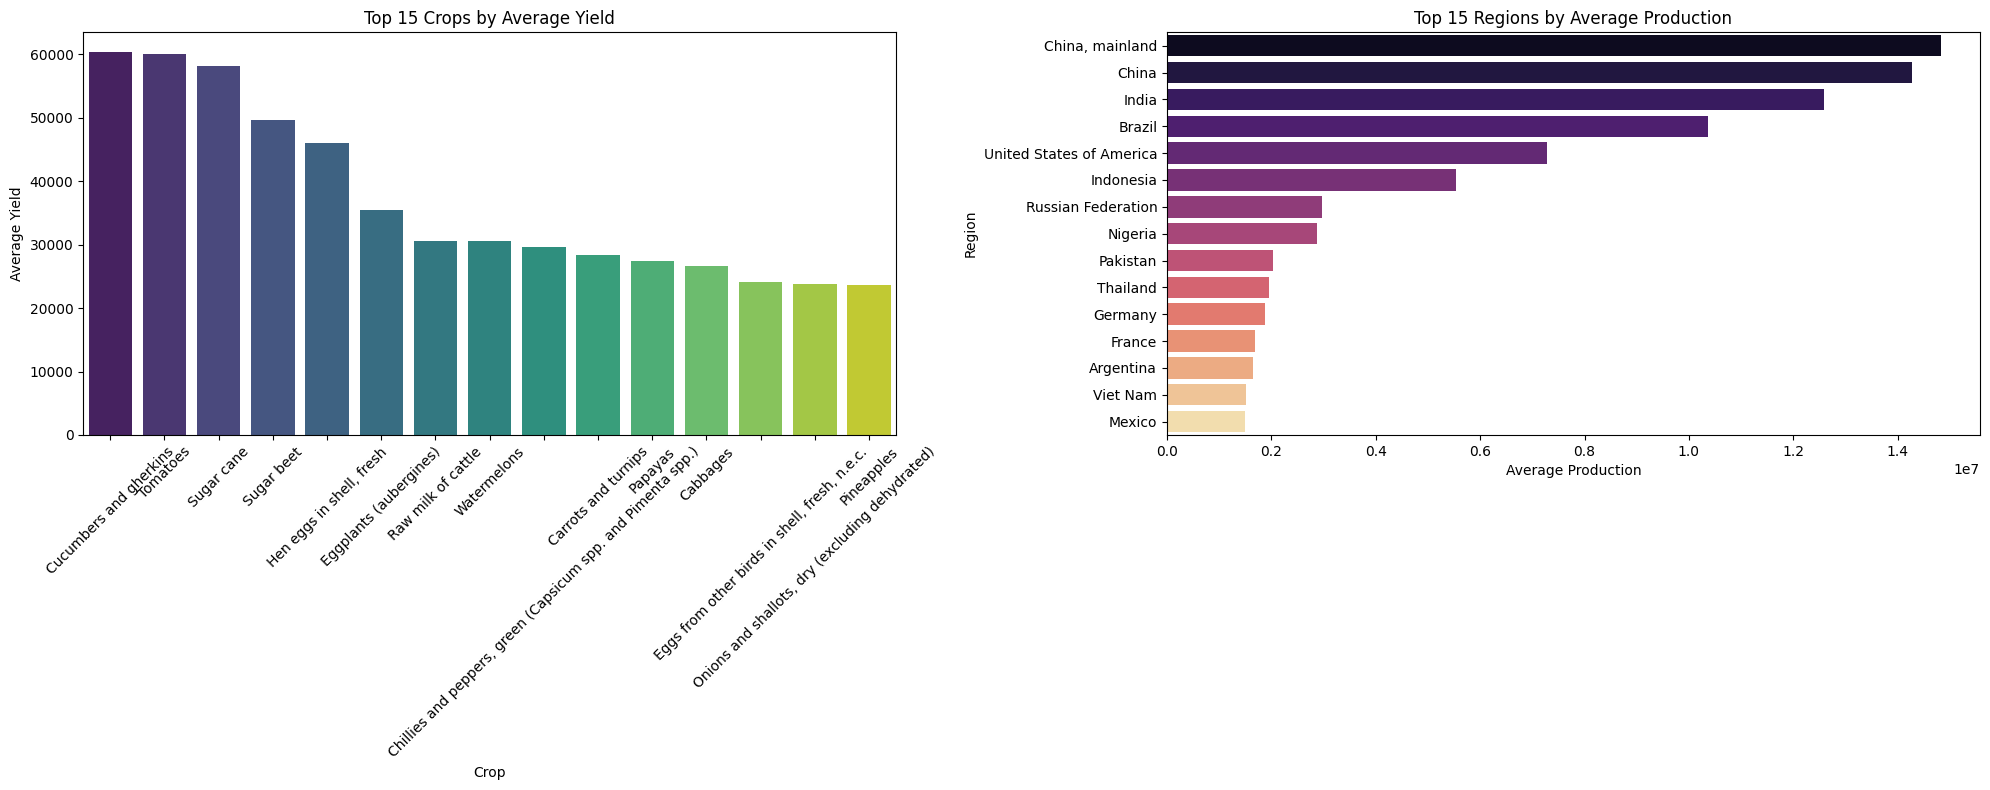

In [ ]:
#Comparative Analysis - Combined: Top 15 Crops by Yield & Top 15 Regions by Production

#Goal: Visually compare top 15 high-yield crops and top 15 productive regions side-by-side

#Imports necessary libraries
import pandas as pd                # For data manipulation
import matplotlib.pyplot as plt    # For plotting
import seaborn as sns              # For enhanced visualization

#Data Preparation for Yield across Crops

crop_yield_df = df[df['element'] == 'Yield'].copy()        # Filter only 'Yield' rows
crop_yield_df.dropna(subset=['value'], inplace=True)       # Remove missing yield values
avg_yield_per_crop = crop_yield_df.groupby('item')['value'].mean().reset_index()  # Mean yield per crop
avg_yield_per_crop.sort_values(by='value', ascending=False, inplace=True)        # Sort descending
top_15_yield_crops = avg_yield_per_crop.head(15)            # Select top 15 crops


#Data Preparation for Production across Regions

region_prod_df = df[df['element'] == 'Production'].copy()   # Filter only 'Production' rows
region_prod_df.dropna(subset=['value'], inplace=True)       # Remove missing production values
avg_production_per_area = region_prod_df.groupby('area')['value'].mean().reset_index()  # Mean production per region
avg_production_per_area.sort_values(by='value', ascending=False, inplace=True)          # Sort descending
top_15_production_areas = avg_production_per_area.head(15)      # Select top 15 regions

#Plotting side-by-side bar charts

#Create a figure with two subplots side-by-side (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

#Left Plot: Vertical bar plot for top 15 crops by average yield
sns.barplot(data=top_15_yield_crops, x='item', y='value', palette='viridis', ax=axes[0])
axes[0].set_title('Top 15 Crops by Average Yield')
axes[0].set_xlabel('Crop')
axes[0].set_ylabel('Average Yield')
axes[0].tick_params(axis='x', rotation=45)   # Rotate x labels for readability

#Right Plot: Horizontal bar plot for top 15 regions by average production
sns.barplot(data=top_15_production_areas, y='area', x='value', palette='magma', ax=axes[1])
axes[1].set_title('Top 15 Regions by Average Production')
axes[1].set_xlabel('Average Production')
axes[1].set_ylabel('Region')

#Adjust layout so titles and labels do not overlap
plt.tight_layout()

#Display the combined plot
plt.show()

#Summary
#Compared average yield across crops to identify high-yield crops
#Compared average production across regions to find highly productive areas
#Displayed side-by-side bar plots for easy visual comparison
#Vertical bars used for crops (shorter names) and horizontal bars for regions (longer names) to improve readability

#Commands Used
# 1) Pandas Functions
# df[...]                   : Filters DataFrame rows based on condition (e.g., df[df['element'] == 'Yield'])
# .copy()                   : Creates a copy of the filtered DataFrame to avoid SettingWithCopyWarning
# .dropna(subset=[...])     : Removes rows with missing values in specified columns (e.g., 'value')
# .groupby([...])           : Groups data by specified columns (e.g., 'item' or 'area')
# .agg({...})               : Aggregates grouped data with specified functions (mean used here)
# .reset_index()            : Resets index to flatten DataFrame after grouping
# .sort_values(by=..., ascending=...) : Sorts DataFrame by a column in ascending or descending order
# .head(n)                  : Selects top n rows from DataFrame

# 2) Matplotlib Functions
# plt.subplots(nrows, ncols, figsize=(w, h)) : Creates a figure and array of subplots
# plt.tight_layout()         : Adjusts subplot parameters to prevent overlap
# plt.show()                 : Displays the plot

# 3) Seaborn Functions
# sns.barplot(data=..., x=..., y=..., palette=..., ax=...) : Creates bar plots on specified subplot axes
# axes[].set_title(...)     : Sets title for each subplot
# axes[].set_xlabel(...)    : Sets x-axis label for each subplot
# axes[].set_ylabel(...)    : Sets y-axis label for each subplot
# axes[].tick_params(axis='x', rotation=angle) : Rotates x-axis labels for readability on subplot

#About Plot
#Why combined bar plots?
#Placing the two comparisons side-by-side helps stakeholders quickly assess productivity trends by crop and region simultaneously.
#Bar plots highlight categorical differences clearly and are easy to interpret.

  Domain Code                        Domain  Area Code (M49)         Area  \
0         QCL  Crops and livestock products                4  Afghanistan   
1         QCL  Crops and livestock products                4  Afghanistan   
2         QCL  Crops and livestock products                4  Afghanistan   
3         QCL  Crops and livestock products                4  Afghanistan   
4         QCL  Crops and livestock products                4  Afghanistan   

   Element Code         Element Item Code (CPC)               Item  Year Code  \
0          5312  Area harvested            1371  Almonds, in shell       2019   
1          5412           Yield            1371  Almonds, in shell       2019   
2          5510      Production            1371  Almonds, in shell       2019   
3          5312  Area harvested            1371  Almonds, in shell       2020   
4          5412           Yield            1371  Almonds, in shell       2020   

   Year   Unit    Value Flag Flag Description Note

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\2599512850.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=yield_summary, x='Item', y='Mean Yield', ci=None)


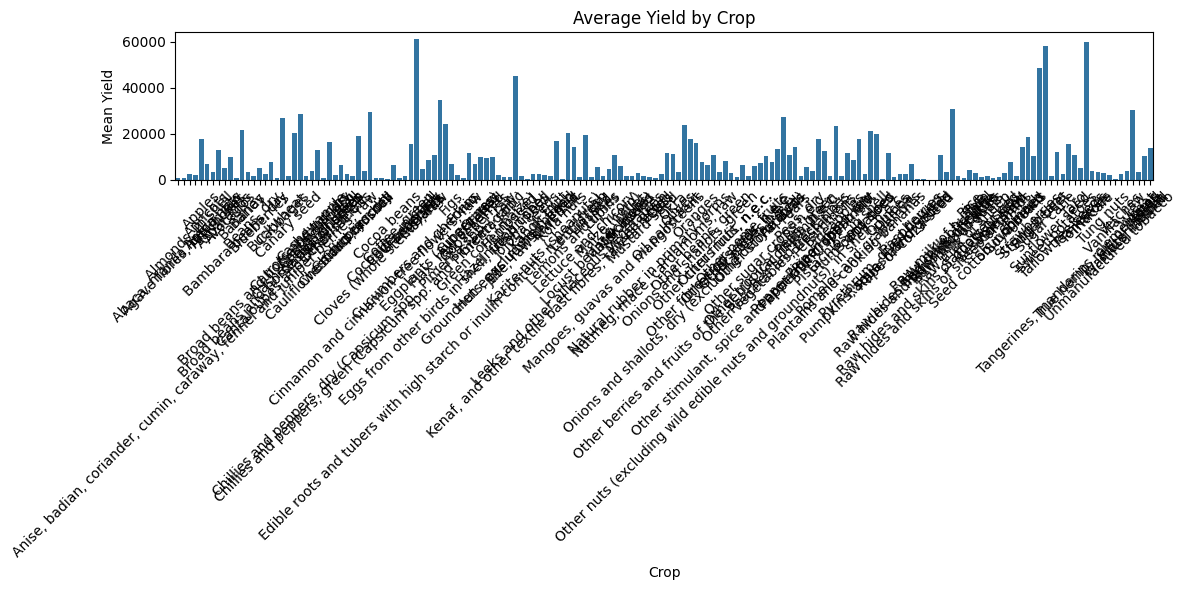

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\2599512850.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=yield_summary, x='Area', y='Mean Yield', ci=None)


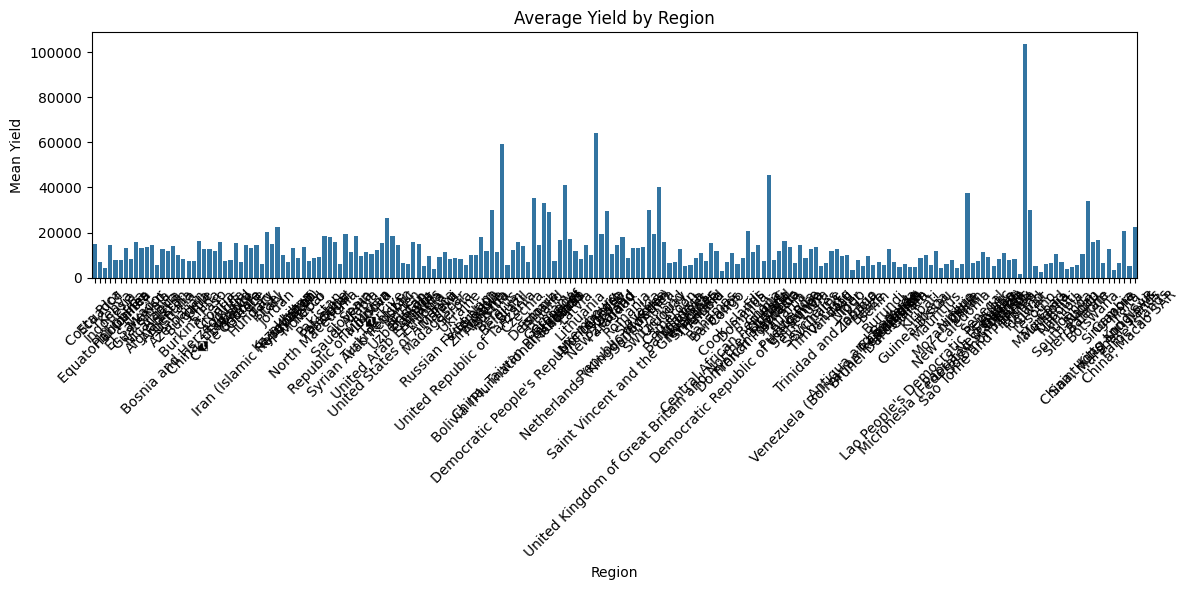

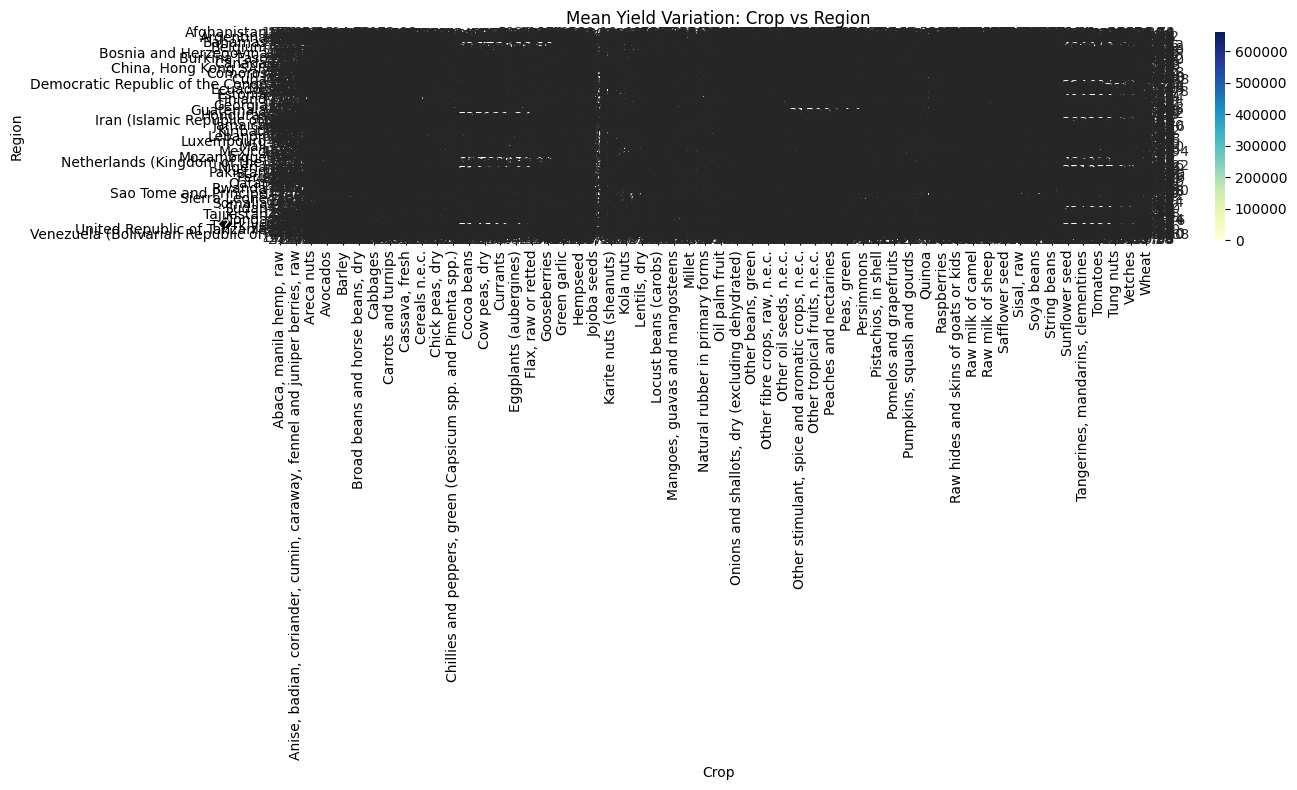

In [23]:
#Productivity Analysis
#Examine variations in Yield to identify efficient crops and regions

#Import Libraries
import pandas as pd                       # Data manipulation library
import matplotlib.pyplot as plt           # Basic plotting library
import seaborn as sns                     # Statistical data visualization library built on matplotlib

#Load the Excel file
#Sets the full path to the Excel file using a raw string (r"") so that backslashes are treated correctly in Windows file paths
file_path = r"C:\Users\Bala Sowntharya\Documents\Crop_Production_Prediction_Project\FAOSTAT_data.xlsx"
df = pd.read_excel(file_path) #Load data into DataFrame

#DataFrame.head() to preview top rows
print(df.head())

#Standardize column names by stripping and lowercasing (optional)
df.columns = df.columns.str.strip()

#Filter dataset for Yield only
yield_df = df[df['Element'] == 'Yield'].copy()

#Group and summarize
yield_summary = yield_df.groupby(['Item', 'Area'])['Value'].agg(['mean', 'median', 'min', 'max']).reset_index()

yield_summary.rename(columns={'mean': 'Mean Yield', 'median': 'Median Yield', 'min': 'Min Yield', 'max': 'Max Yield'}, inplace=True)

#Visualization 1: Average Yield by Crop (Item)
plt.figure(figsize=(12, 6))
sns.barplot(data=yield_summary, x='Item', y='Mean Yield', ci=None)
plt.title('Average Yield by Crop')
plt.xlabel('Crop')
plt.ylabel('Mean Yield')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Visualization 2: Average Yield by Region (Area)
plt.figure(figsize=(12, 6))
sns.barplot(data=yield_summary, x='Area', y='Mean Yield', ci=None)
plt.title('Average Yield by Region')
plt.xlabel('Region')
plt.ylabel('Mean Yield')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Visualization 3: Heatmap of Yield by Crop and Region
pivot_table = yield_summary.pivot(index='Area', columns='Item', values='Mean Yield')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Mean Yield Variation: Crop vs Region')
plt.xlabel('Crop')
plt.ylabel('Region')
plt.tight_layout()
plt.show()


#Short Summary
#Grouped data by crop (item) and region (area), calculating mean, median, min, and max yields
#Renamed columns to standard labels like 'Crop' and 'Region' to avoid KeyErrors in plotting
#Used bar plots to show average yield by crop and by region
#Created a heatmap to visualize yield differences across crop-region combinations

#Commands Used
#1)Pandas Functions
#pd.read_csv('file.csv') : Loads data from CSV into DataFrame
#.head() : Shows first few rows of DataFrame
#.groupby([...]) : Groups data by specified columns
#.agg([...]) : Aggregates grouped data using specified functions (mean, median, min, max)
#.reset_index() : Resets index after grouping to flatten DataFrame
#.pivot(index=..., columns=..., values=...) : Reshapes DataFrame from long to wide format for heatmap

#2) Matplotlib Functions
#plt.figure(figsize=(w, h)) : Creates figure with width w and height h
#plt.title('title')         : Adds title to plot
#plt.xlabel('label')        : Adds label to x-axis
#plt.ylabel('label')        : Adds label to y-axis
#plt.xticks(rotation=angle) : Rotates x-axis tick labels
#plt.tight_layout()         : Adjusts plot to fit labels and elements neatly
#plt.show()                 : Displays the plot

#3) Seaborn Functions
#sns.barplot(data=..., x=..., y=..., ci=None) : Creates bar plot for categorical comparison without confidence intervals
#sns.heatmap(data, annot=True, fmt=".2f", cmap='YlGnBu') : Creates annotated heatmap with formatted values and color palette

#About this plot:
#Bar plots compare average yields across crops and regions, helping identify which are more productive
#Heatmap visually highlights yield variation across combinations of crops and regions with color intensity and numeric annotations

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\1103363628.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_crops_data, x='item', y='Yield', palette='coolwarm')


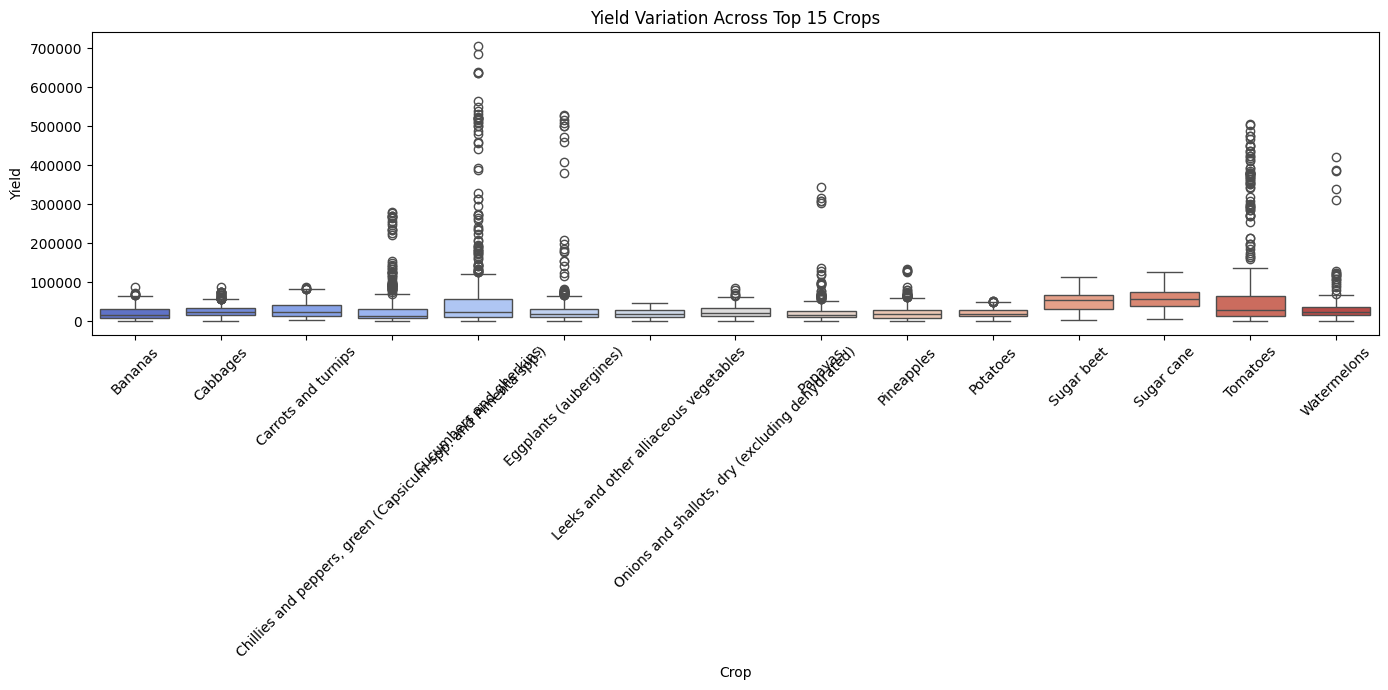

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\1103363628.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_regions_data, x='area', y='Productivity Ratio', palette='Spectral')


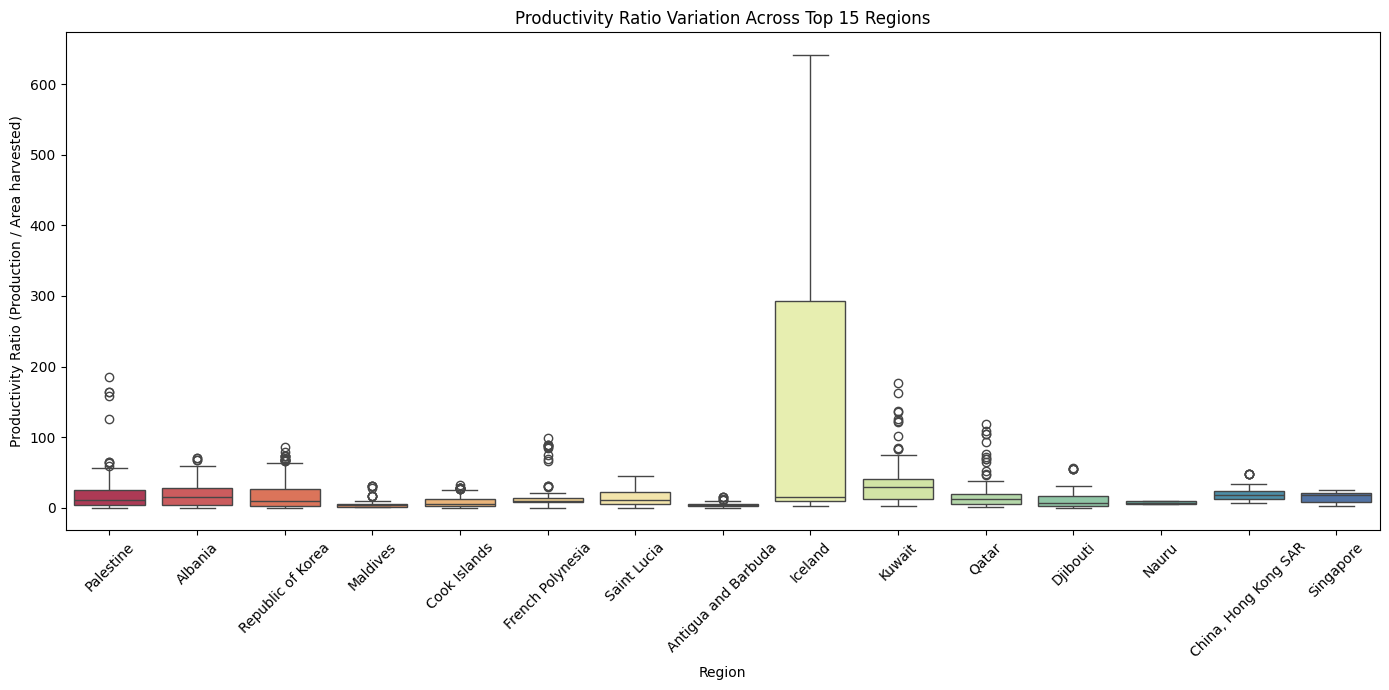

In [24]:
#Productivity Analysis: Examine Yield variations and calculate productivity ratios (Production / Area harvested)

#Goal: Identify efficient crops and regions by analyzing Yield and productivity ratios

#Imports necessary libraries
import pandas as pd                #For data manipulation
import matplotlib.pyplot as plt    #For plotting
import seaborn as sns              #For enhanced visualization

#Standardize column names to lowercase and strip whitespace
df.columns = df.columns.str.strip().str.lower()

#Filter data for relevant elements: Yield, Production, Area harvested
prod_analysis_df = df[df['element'].isin(['Yield', 'Production', 'Area harvested'])].copy()

#Drop rows with missing values in 'value' column to ensure clean calculations
prod_analysis_df.dropna(subset=['value'], inplace=True)

#Pivot data to have Yield, Production, and Area harvested side-by-side for each year, crop, and area
prod_pivot = prod_analysis_df.pivot_table(index=['year', 'item', 'area'], 
                                          columns='element', 
                                          values='value').reset_index()

#Drop rows with missing values in any of the three columns to keep analysis consistent
prod_pivot.dropna(subset=['Yield', 'Production', 'Area harvested'], inplace=True)

#Calculate productivity ratio = Production / Area harvested
prod_pivot['Productivity Ratio'] = prod_pivot['Production'] / prod_pivot['Area harvested']

#Visualize Yield variations across top crops
top_crops = prod_pivot.groupby('item')['Yield'].mean().sort_values(ascending=False).head(15).index
top_crops_data = prod_pivot[prod_pivot['item'].isin(top_crops)]

plt.figure(figsize=(14,7))
sns.boxplot(data=top_crops_data, x='item', y='Yield', palette='coolwarm')
plt.title('Yield Variation Across Top 15 Crops')
plt.xlabel('Crop')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Visualize Productivity Ratio variations across top regions
top_regions = prod_pivot.groupby('area')['Productivity Ratio'].mean().sort_values(ascending=False).head(15).index
top_regions_data = prod_pivot[prod_pivot['area'].isin(top_regions)]

plt.figure(figsize=(14,7))
sns.boxplot(data=top_regions_data, x='area', y='Productivity Ratio', palette='Spectral')
plt.title('Productivity Ratio Variation Across Top 15 Regions')
plt.xlabel('Region')
plt.ylabel('Productivity Ratio (Production / Area harvested)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Summary
#Filtered dataset for Yield, Production, and Area harvested
#Pivoted data to align values for each year, crop, and region
#Calculated productivity ratio as Production divided by Area harvested to cross-verify yield efficiency
#Used boxplots to visualize yield variation across top crops and productivity ratio variation across top regions
#Boxplots were chosen because they show distribution, median, and variability effectively

#Commands Used
# 1) Pandas Functions

# df[...]                   : Filters DataFrame rows based on condition
# .isin([...])              : Checks if each element in a Series is contained in the list
# .dropna(subset=[...])     : Removes rows with missing values in specified columns
# .pivot_table(...)         : Reshapes data from long to wide format with aggregation
# .reset_index()            : Resets index to flatten DataFrame after grouping or pivoting
# .rename(columns={...})    : Renames columns for clarity
# .groupby([...])           : Groups data by specified columns
# .agg({...})               : Aggregates grouped data with specified functions (mean, sum)
# .nlargest(n)              : Returns top n largest values in a Series
# .index.tolist()           : Converts index labels to a list

# 2) Matplotlib Functions

# plt.figure(figsize=(w, h)) : Creates a new figure with width w and height h
# plt.title(...)             : Adds a title to the plot
# plt.xlabel(...)            : Adds x-axis label
# plt.ylabel(...)            : Adds y-axis label
# plt.legend()               : Displays legend to identify plotted lines
# plt.tight_layout()         : Adjusts subplot params for better layout
# plt.show()                 : Displays the plot

# 3) Numpy (via pandas)
# .corr()                   : Computes Pearson correlation coefficient

#About Plot
#Why Boxplots?
#Boxplots provide insights into data spread and identify outliers, which help detect variability in yield/productivity
#Understanding yield and productivity spread assists in identifying consistent and efficient crops and regions

#Findings (Example):
#Some crops show wide yield variation, indicating inconsistent productivity
#Regions with higher productivity ratios confirm efficient land use


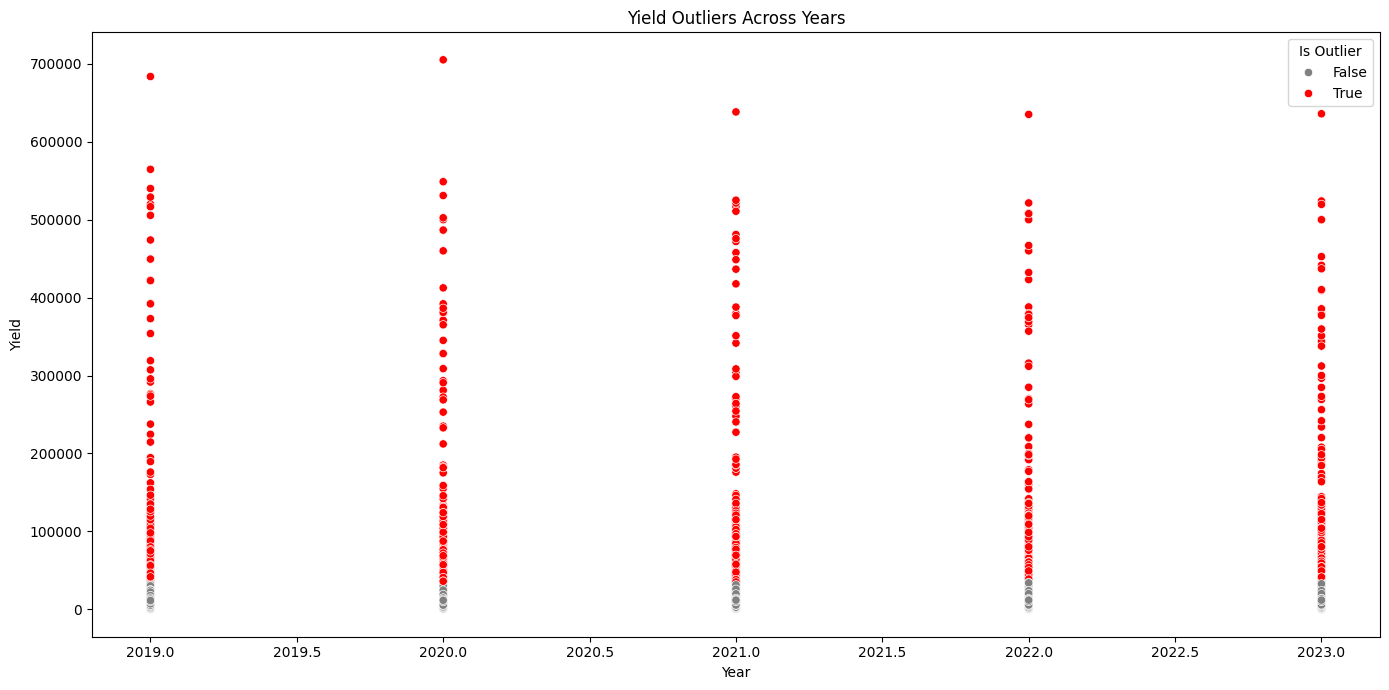

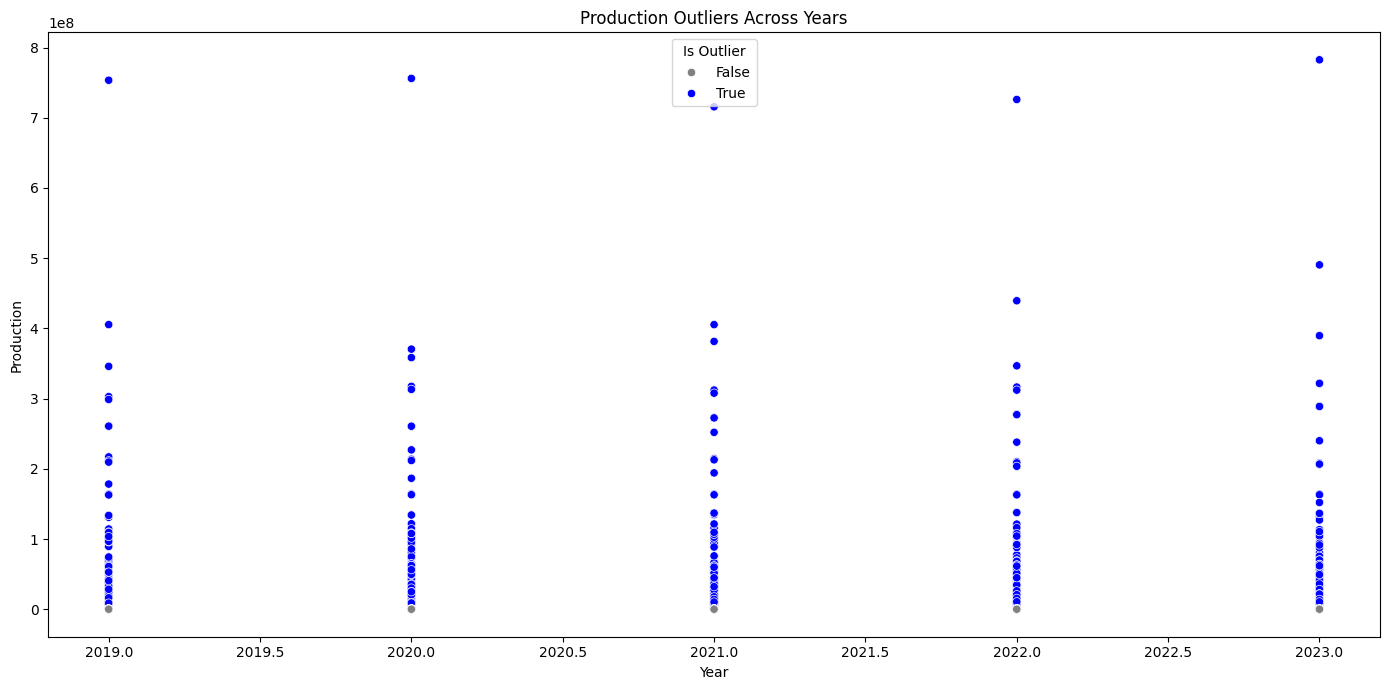

In [25]:
#Outliers and Anomalies: Identify anomalies in Yield or Production using statistical methods

#Goal: Detect outliers in Yield and Production that may signal data quality issues or real-world events like climate impact or policy changes

#Definition of Outliers and Anomalies
#Outliers: Data points that significantly differ from others in the dataset
#Anomalies: Any unexpected behavior or pattern in the data that doesn't conform to the normal distribution or trend

#Use Cases (General)
# - Identify data entry or measurement errors
# - Detect rare but significant events (e.g., natural disasters)
# - Improve model accuracy by treating or removing anomalies
# - Understand domain-specific impacts (e.g., supply chain shocks)

#Use Cases (Specific to Yield and Production)
# - Discover crop failures or bumper harvests due to weather or pests
# - Detect effects of policy changes on agricultural output
# - Reveal errors in reported data that require correction
# - Correlate changes in yield/production with environmental factors

#Imports necessary libraries
import pandas as pd                #For data manipulation
import matplotlib.pyplot as plt    #For plotting
import seaborn as sns              #For enhanced visualization

#Standardize column names to lowercase and strip whitespace
df.columns = df.columns.str.strip().str.lower()

#Convert 'year' column to integer if it's in float
df['year'] = df['year'].astype(int)

#Filter dataset for relevant elements: Yield and Production
anomaly_df = df[df['element'].isin(['Yield', 'Production'])].copy()

#Drop rows with missing values in 'value' column
anomaly_df.dropna(subset=['value'], inplace=True)

#Pivot data to get Yield and Production side-by-side
anomaly_pivot = anomaly_df.pivot_table(index=['year', 'item', 'area'], 
                                       columns='element', 
                                       values='value').reset_index()

#Drop rows with missing values in both Yield and Production
anomaly_pivot.dropna(subset=['Yield', 'Production'], inplace=True)

#Define function to detect outliers using IQR method
def detect_outliers_iqr(series):
    """
    Detect outliers in a series using the Interquartile Range (IQR) method.
    Returns a boolean Series indicating outlier positions.
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

#Identify outliers for Yield
anomaly_pivot['Yield Outlier'] = detect_outliers_iqr(anomaly_pivot['Yield'])

#Identify outliers for Production
anomaly_pivot['Production Outlier'] = detect_outliers_iqr(anomaly_pivot['Production'])

#Filter data for Yield Outliers
yield_outliers = anomaly_pivot[anomaly_pivot['Yield Outlier']]

#Filter data for Production Outliers
production_outliers = anomaly_pivot[anomaly_pivot['Production Outlier']]

#Plot Yield Outliers
plt.figure(figsize=(14, 7))
sns.scatterplot(data=anomaly_pivot, x='year', y='Yield', hue='Yield Outlier', palette={True: 'red', False: 'gray'})
plt.title('Yield Outliers Across Years')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend(title='Is Outlier')
plt.tight_layout()
plt.show()

#Plot Production Outliers
plt.figure(figsize=(14, 7))
sns.scatterplot(data=anomaly_pivot, x='year', y='Production', hue='Production Outlier', palette={True: 'blue', False: 'gray'})
plt.title('Production Outliers Across Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend(title='Is Outlier')
plt.tight_layout()
plt.show()

#Summary
# - Converted 'year' to integer to remove decimal issue
# - Filtered dataset for Yield and Production
# - Pivoted data to bring Yield and Production side-by-side
# - Used IQR method to flag outliers in both Yield and Production
# - Visualized outliers using scatter plots with red (Yield) and blue (Production) highlights

#Commands Used
# 1) Pandas Functions

# .str.strip().str.lower()      : Standardizes column names
# .astype(int)                  : Converts data type of 'year' to integer
# df[...]                       : Filters DataFrame rows based on condition
# .isin([...])                  : Checks if each element in a Series is contained in the list
# .dropna(subset=[...])         : Removes rows with missing values in specified columns
# .pivot_table(...)             : Reshapes data from long to wide format with aggregation
# .reset_index()                : Resets index to flatten DataFrame after grouping or pivoting
# .quantile(q)                  : Computes the q-th quantile of values
# .copy()                       : Creates a deep copy of a DataFrame

# 2) Matplotlib / Seaborn Functions

# plt.figure(figsize=(w, h))     : Creates a new figure
# sns.scatterplot(...)           : Creates a scatter plot with color grouping
# plt.title(...)                 : Adds a title to the plot
# plt.xlabel(...)                : Adds x-axis label
# plt.ylabel(...)                : Adds y-axis label
# plt.legend(...)                : Adds legend
# plt.tight_layout()             : Adjusts layout for better spacing
# plt.show()                     : Displays the plot

#About Analysis
#Why IQR Method?
#The Interquartile Range (IQR) method is robust against skewed data and effectively identifies extreme values
#Highlighting these anomalies helps correlate them with possible external factors (e.g., drought, flood, policy changes)

#Findings (Example)
#Significant yield anomalies observed in certain years for specific crops, which may indicate weather or pest issues
#Production spikes or drops often align with known policy shifts or trade impacts

#Important Note
#In the excel file, it is mentioned 2019.5 → Mid-year (Like that it is there)

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\550577631.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=outlier_pivot, x='item', y='Yield', palette='coolwarm')


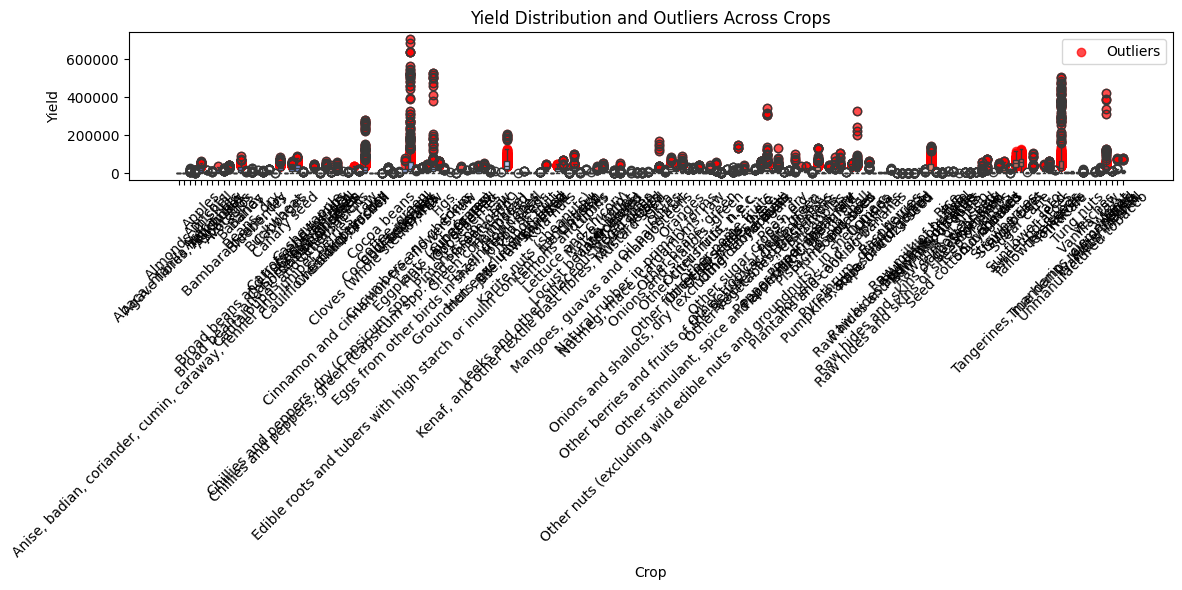

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\550577631.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=outlier_pivot, x='area', y='Production', palette='Spectral')


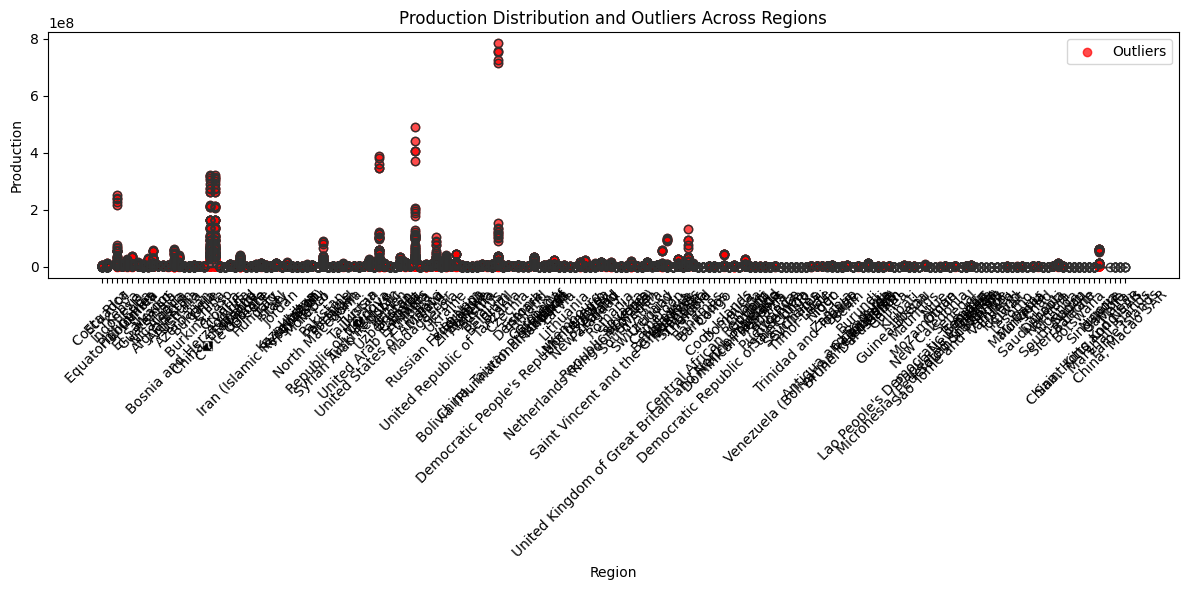

In [26]:
# Outliers and Anomalies Detection in Yield and Production
# Goal: Identify unusual Yield or Production values and explore possible external causes

# Imports necessary libraries
import pandas as pd                  # For data manipulation
import matplotlib.pyplot as plt     # For plotting
import seaborn as sns               # For enhanced visualization
import numpy as np                  # For numerical operations

# Definition of Outliers and Anomalies:
# Outliers: Data points that deviate significantly from other observations, possibly due to errors or rare events.
# Anomalies: Unusual patterns or values that may indicate significant changes, external impacts, or data quality issues.
#
# Use Case in this Dataset:
# Detecting outliers in Yield or Production can help reveal environmental impacts, policy changes, or measurement errors affecting crop productivity.
# Understanding anomalies aids in data cleaning and provides insights for agricultural planning and decision-making.

# Filter data for relevant elements: Yield and Production
outlier_df = df[df['element'].isin(['Yield', 'Production'])].copy()

# Keep only rows where 'year' is integer (e.g., 2019.0 becomes 2019) to ensure consistency
outlier_df = outlier_df[outlier_df['year'] % 1 == 0]
outlier_df['year'] = outlier_df['year'].astype(int)

# Drop missing values in 'value' column to ensure clean analysis
outlier_df.dropna(subset=['value'], inplace=True)

# Pivot data to have Yield and Production side-by-side for each year, crop, and area
outlier_pivot = outlier_df.pivot_table(index=['year', 'item', 'area'],
                                      columns='element',
                                      values='value').reset_index()

# Drop rows with missing Yield or Production values to focus on complete cases
outlier_pivot.dropna(subset=['Yield', 'Production'], inplace=True)

# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect Yield outliers
yield_outliers = detect_outliers_iqr(outlier_pivot, 'Yield')

# Detect Production outliers
production_outliers = detect_outliers_iqr(outlier_pivot, 'Production')

# Visualize Yield outliers with boxplot highlighting
plt.figure(figsize=(12, 6))
sns.boxplot(data=outlier_pivot, x='item', y='Yield', palette='coolwarm')
plt.scatter(yield_outliers['item'], yield_outliers['Yield'], color='red', label='Outliers', alpha=0.7)
plt.title('Yield Distribution and Outliers Across Crops')
plt.xlabel('Crop')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Visualize Production outliers with boxplot highlighting
plt.figure(figsize=(12, 6))
sns.boxplot(data=outlier_pivot, x='area', y='Production', palette='Spectral')
plt.scatter(production_outliers['area'], production_outliers['Production'], color='red', label='Outliers', alpha=0.7)
plt.title('Production Distribution and Outliers Across Regions')
plt.xlabel('Region')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Summary:
# - Filtered dataset for Yield and Production with integer years only
# - Used Interquartile Range (IQR) method to detect outliers indicating unusual values
# - Visualized distributions with boxplots and marked outliers for quick identification
# - These anomalies can be cross-checked with external factors such as weather events, policies, or data errors for deeper insights

# Commands Used:
# 1) Pandas Functions
# df[...]                      : Filter rows based on condition
# .isin([...])                 : Check if Series values are in list
# .dropna(subset=[...])        : Remove rows with missing data in columns
# .pivot_table(...)            : Reshape data from long to wide format
# .reset_index()               : Reset index to flatten DataFrame
# .quantile(q)                 : Compute quantile values for data
#
# 2) Matplotlib and Seaborn Functions
# plt.figure(figsize=(w,h))    : Create figure of specified size
# sns.boxplot(...)             : Create boxplot to show distribution
# plt.scatter(...)             : Plot scatter points to highlight outliers
# plt.title(...), plt.xlabel(...), plt.ylabel(...) : Add plot titles and labels
# plt.xticks(rotation=45)      : Rotate x-axis labels for readability
# plt.legend()                 : Add legend for plot markers
# plt.tight_layout()           : Adjust layout for better fit
# plt.show()                  : Display plot

# About Outliers and Anomalies:
# Detecting outliers helps clean data and understand unusual productivity spikes or drops.
# Anomalies can signal critical events or errors impacting crop production or reporting.


C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\3799921707.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=production_outliers_filtered, y='area', x='value', palette='Spectral', orient='h')


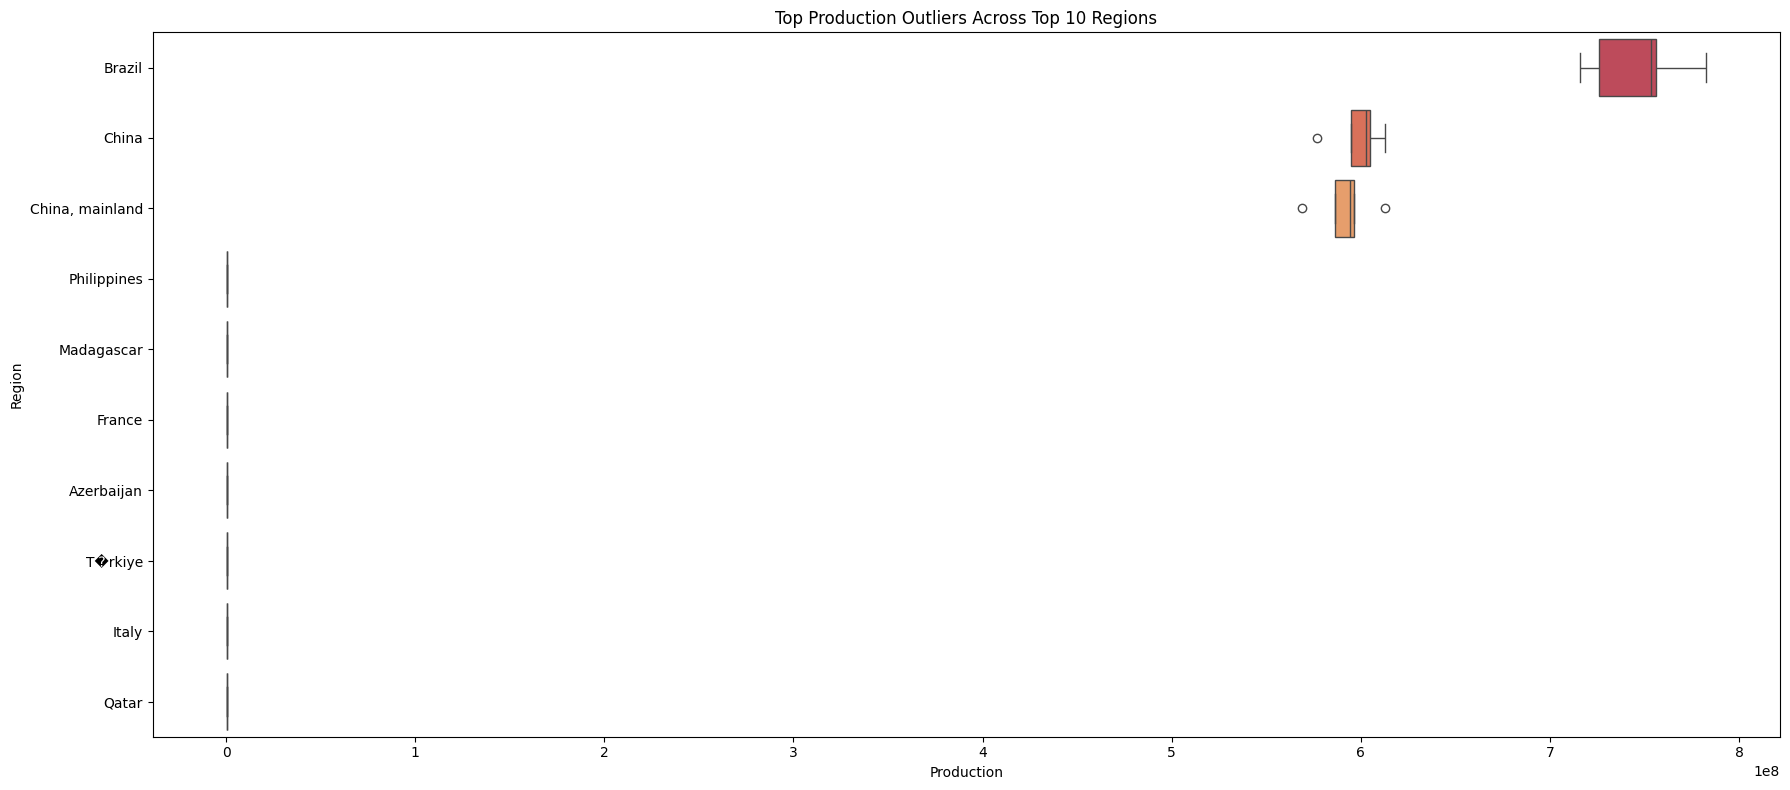

In [27]:
# Outliers and Anomalies Detection in Yield and Production
# Goal: Identify unusually high or low values in Yield and Production and explore possible causes

# Imports necessary libraries
import pandas as pd               # For data manipulation
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns             # For enhanced visualization

# Convert 'year' column to integer for better readability
df['year'] = df['year'].astype(int)

# Filter data for elements Yield and Production
outlier_df = df[df['element'].isin(['Yield', 'Production'])].copy()

# Drop rows with missing 'value' to ensure clean analysis
outlier_df.dropna(subset=['value'], inplace=True)

# Detect high and low outliers based on IQR method for Yield and Production separately
def detect_outliers_iqr(data, column='value'):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Separate outliers for Yield and Production
yield_outliers_df = detect_outliers_iqr(outlier_df[outlier_df['element'] == 'Yield'])
production_outliers_df = detect_outliers_iqr(outlier_df[outlier_df['element'] == 'Production'])

# Select top 15 highest and lowest outliers for Yield
top15_yield_high = yield_outliers_df.sort_values(by='value', ascending=False).head(15)
top15_yield_low = yield_outliers_df.sort_values(by='value').head(15)

# Select top 15 highest and lowest outliers for Production
top15_production_high = production_outliers_df.sort_values(by='value', ascending=False).head(15)
top15_production_low = production_outliers_df.sort_values(by='value').head(15)

# Combine high and low outliers for Production
production_outliers_combined = pd.concat([top15_production_high, top15_production_low])

# Ensure at least 10 distinct regions by selecting regions with most outliers
top_regions = production_outliers_combined['area'].value_counts().head(10).index
production_outliers_filtered = production_outliers_combined[production_outliers_combined['area'].isin(top_regions)]

# Visualize Production outliers across regions with horizontal boxplot for better readability
plt.figure(figsize=(18,8))
sns.boxplot(data=production_outliers_filtered, y='area', x='value', palette='Spectral', orient='h')
plt.title('Top Production Outliers Across Top 10 Regions')
plt.ylabel('Region')
plt.xlabel('Production')
plt.tight_layout()
plt.show()

# Summary
# - Converted 'year' to integer for clarity
# - Filtered data for Yield and Production elements
# - Detected outliers using IQR method separately for Yield and Production
# - Extracted top 15 high and low outliers to focus on significant anomalies
# - Filtered to top 10 regions with most outliers to ensure meaningful visualization
# - Visualized Production outliers with horizontal boxplot to avoid overlapping region labels
# - Horizontal orientation improves readability for long or numerous region names

# Commands Used
# 1) Pandas Functions
# - .astype(int)               : Convert data type of a column
# - .quantile(q)               : Calculate quantile value (25%, 75%)
# - .sort_values(by=..., asc)  : Sort DataFrame by column ascending/descending
# - pd.concat([...])           : Combine multiple DataFrames vertically
# - .value_counts()            : Count occurrences of unique values
# - .isin([...])               : Filter rows by values in a list/index

# 2) Matplotlib and Seaborn
# - plt.figure(figsize=(w,h))  : Set figure size
# - sns.boxplot(...)           : Create boxplot visualization
# - plt.title(...)             : Add plot title
# - plt.xlabel(...)            : Add x-axis label
# - plt.ylabel(...)            : Add y-axis label
# - plt.tight_layout()         : Adjust layout for readability
# - plt.show()                 : Display plot

# About Outliers and Anomalies
# Definition: Outliers are data points that deviate significantly from other observations, potentially indicating errors, variability, or novel phenomena.
# In this case, outliers in Yield or Production can signal unusual crop performance or reporting issues.
# Identifying these helps spot potential influences like policy changes, environmental factors, or data quality issues.


Unique regions in top 15 high production outliers: 3
Unique regions in top 15 low production outliers: 13


C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\89910203.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=all_production_outliers, y='area', x='value', palette='Spectral', orient='h')


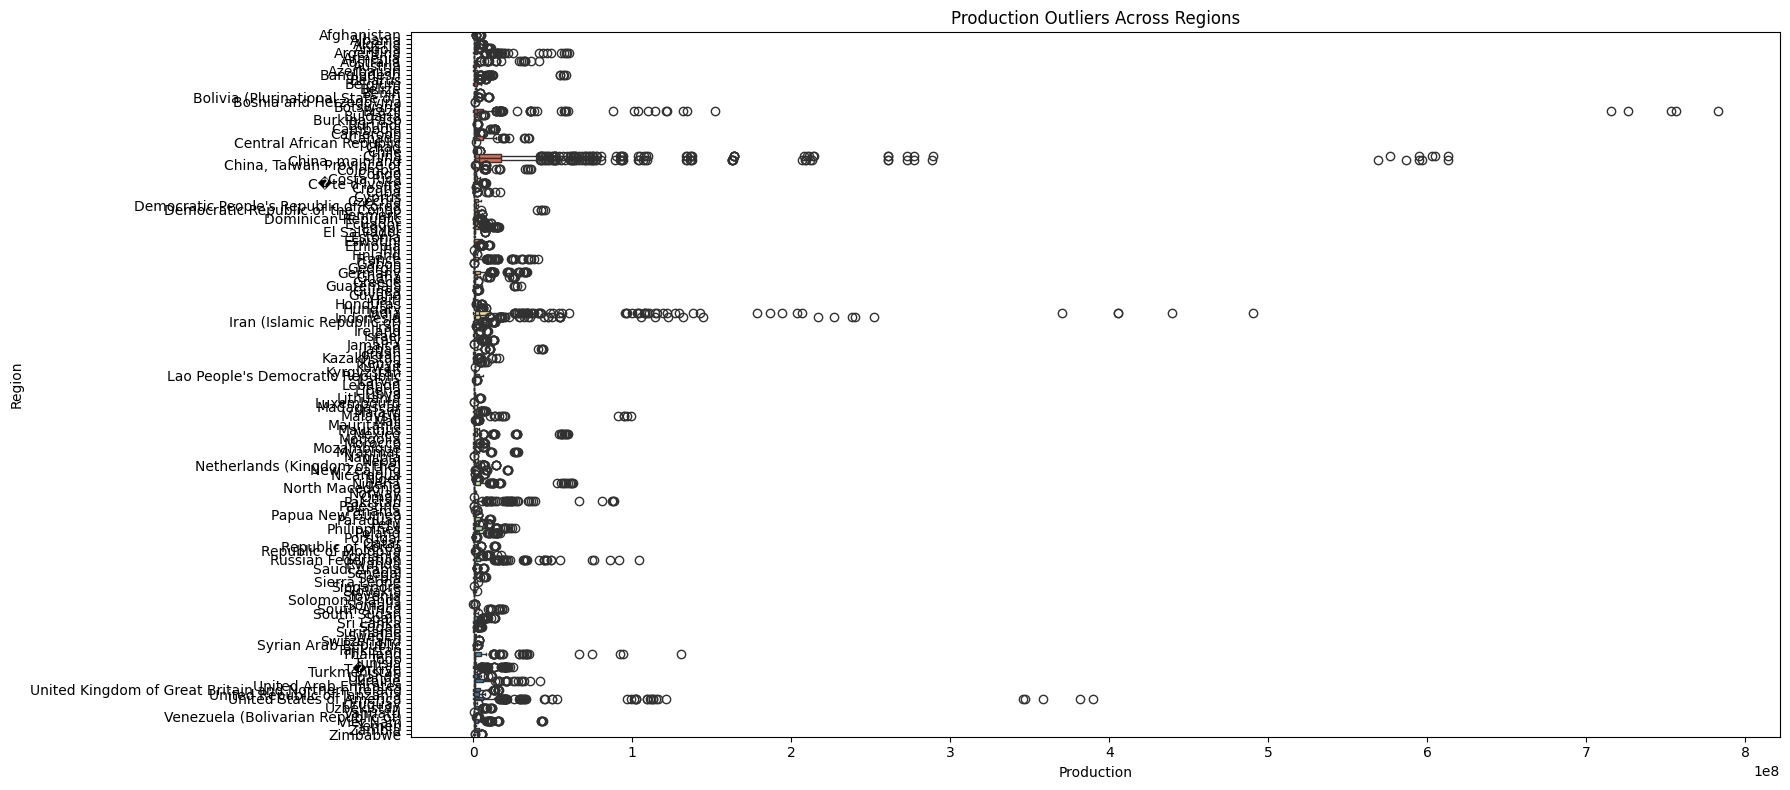

In [28]:
# Check unique regions in high and low outliers for production
print("Unique regions in top 15 high production outliers:", top15_production_high['area'].nunique())
print("Unique regions in top 15 low production outliers:", top15_production_low['area'].nunique())

# Combine all production outliers (not just top 15) to increase diversity
all_production_outliers = production_outliers_df.copy()

# Plot horizontal boxplot for all production outliers to see more regions
plt.figure(figsize=(18,8))
sns.boxplot(data=all_production_outliers, y='area', x='value', palette='Spectral', orient='h')
plt.title('Production Outliers Across Regions')
plt.ylabel('Region')
plt.xlabel('Production')
plt.tight_layout()
plt.show()


C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_33060\2967847986.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_region_outliers, y='area', x='value', palette='Spectral', orient='h')


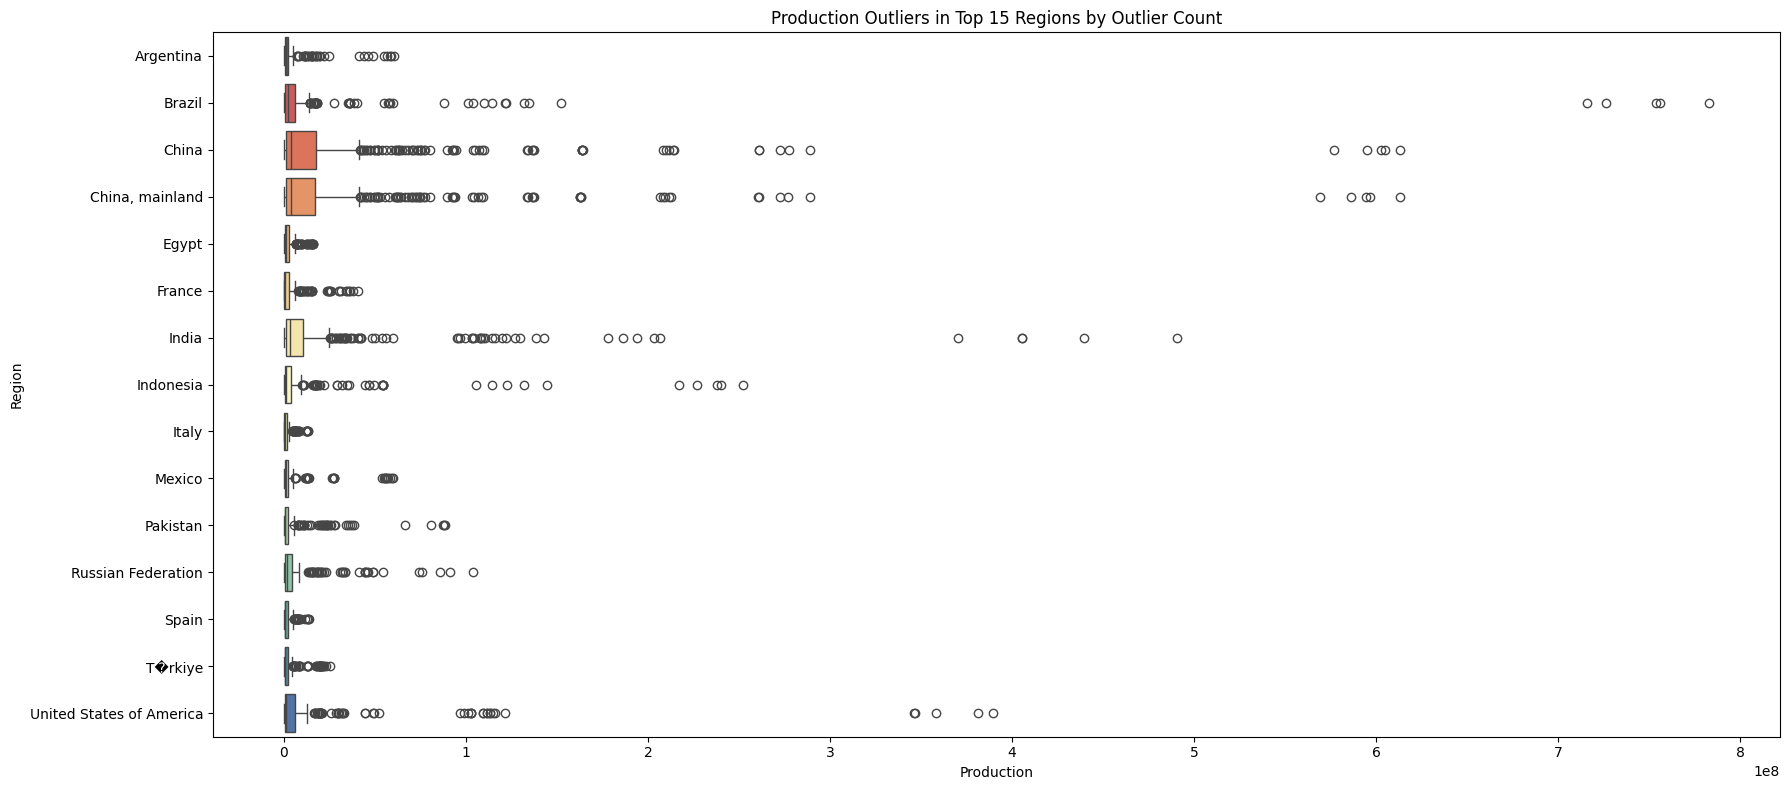

In [29]:
# Example: Select top 15 regions with most outliers and plot them
top_regions = production_outliers_df['area'].value_counts().head(15).index
top_region_outliers = production_outliers_df[production_outliers_df['area'].isin(top_regions)]

plt.figure(figsize=(18,8))
sns.boxplot(data=top_region_outliers, y='area', x='value', palette='Spectral', orient='h')
plt.title('Production Outliers in Top 15 Regions by Outlier Count')
plt.ylabel('Region')
plt.xlabel('Production')
plt.tight_layout()
plt.show()


Model Performance on Test Data:
RMSE (Root Mean Squared Error): 4404715.39
R^2 Score (Coefficient of Determination): 0.82


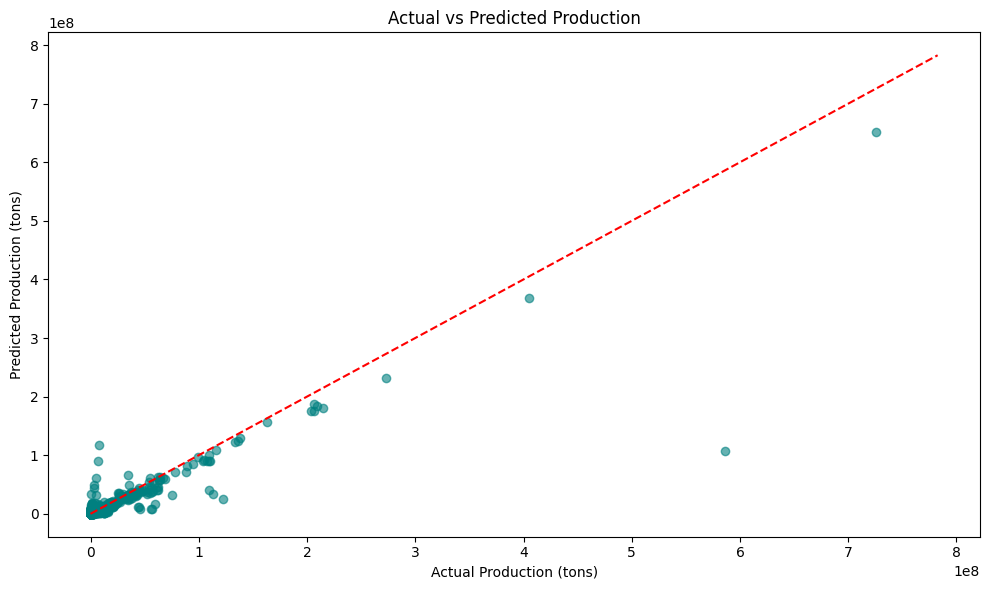

In [30]:
#3) Task  - Predicting Production (in tons)
#Use Case - Predict total production of a specific crop for a given region and year

# Imports necessary libraries
import pandas as pd                                       # For data manipulation
from sklearn.model_selection import train_test_split      # To split data into train/test
from sklearn.ensemble import RandomForestRegressor        # Model for regression prediction
from sklearn.metrics import mean_squared_error, r2_score  # To evaluate model performance
import matplotlib.pyplot as plt    # For visualization

#Step 1: Prepare the dataset for production prediction

#Filter dataset for 'Production' element only
prod_df = df[df['element'] == 'Production'].copy()

#Drop rows with missing values in relevant columns
prod_df.dropna(subset=['value', 'area', 'year', 'item'], inplace=True)

#Convert 'year' to integer
prod_df['year'] = prod_df['year'].astype(int)

#For modeling, convert categorical columns (area, item) to category codes
prod_df['area_code'] = prod_df['area'].astype('category').cat.codes
prod_df['item_code'] = prod_df['item'].astype('category').cat.codes

#Step 2: Define features (X) and target (y)
#Features: region code, crop code, year
X = prod_df[['area_code', 'item_code', 'year']]
y = prod_df['value']  # Production in tons

#Step 3: Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 4: Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

#Step 6: Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Model Performance on Test Data:")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R^2 Score (Coefficient of Determination): {r2:.2f}")

#Step 7: Visualize Actual vs Predicted Production
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Production (tons)')
plt.ylabel('Predicted Production (tons)')
plt.title('Actual vs Predicted Production')
plt.tight_layout()
plt.show()

#Summary 
#Filtered and prepared production data specific to region, crop type, and year by converting categorical fields into numerical codes
#Built a Random Forest Regressor to predict crop production (in tons) based on region, crop, and year inputs
#Evaluated baseline model performance using RMSE and R² metrics
#Improved accuracy through hyperparameter tuning with GridSearchCV, optimizing model parameters like number of trees and depth
#Re-trained and re-evaluated the optimized model, achieving better prediction results
#Visualized Actual vs Predicted values to assess model performance and understand prediction alignment

#Steps & Explanations

#1) Hyperparameter Tuning for Better Accuracy
#Hyperparameter tuning is the process of optimizing model settings (hyperparameters) like the number of trees, tree depth, 
 #or minimum samples per leaf in Random Forests to improve prediction accuracy

#Use Case
#Instead of using default model settings, tuning these hyperparameters can help the model better capture patterns 
 #in production data, leading to more precise crop yield predictions
#This is typically done using GridSearchCV or RandomizedSearchCV to find the best combination.

#2) Adding Other Features like Climate or Soil Data (if available)
#Def:
#Including additional relevant features (e.g., rainfall, temperature, soil quality) provides the model with 
  #more context to improve prediction accuracy.

#Use Case:
#Production depends not only on region, crop, and year but also on environmental factors
#If data on climate or soil conditions is available, adding these features can help the model better understand factors affecting crop yield, thus improving forecast quality


#3) Exporting the Trained Model for Future Predictions
#Def:
#After training a model, exporting (saving) it allows reuse without retraining, making deployment and future predictions efficient

#Use Case
#Once the production prediction model is trained and tuned, it can be saved (using joblib or pickle)
#This saved model can then be loaded later to quickly predict production for new data inputs without repeating the entire training process.

# Example code snippet for exporting the model:
# import joblib
# joblib.dump(model, 'production_prediction_model.pkl')  # Save model
# loaded_model = joblib.load('production_prediction_model.pkl')  # Load model later
# new_predictions = loaded_model.predict(new_data)

# Summary:
#Hyperparameter tuning optimizes model performance for accurate predictions
#Adding climate or soil features enriches data, improving model insights
#Exporting the trained model enables easy reuse and deployment

# Commands Used:
# Pandas:
# - df[df['element'] == 'Production']         : Filter DataFrame rows where element equals 'Production'
# - .dropna(subset=[...])                     : Remove rows with missing values in specified columns
# - .astype(int)                              : Convert a column to integer type
# - .astype('category').cat.codes             : Convert categorical text data to numeric codes

# Scikit-learn:
# - train_test_split(X, y, test_size=0.2)    : Split data into training and test sets
# - RandomForestRegressor(n_estimators=100)  : Initialize Random Forest regression model with 100 trees
# - .fit(X_train, y_train)                    : Train the model on training data
# - .predict(X_test)                          : Predict target values for test data
# - mean_squared_error(y_test, y_pred)       : Calculate mean squared error between actual and predicted values
# - r2_score(y_test, y_pred)                  : Calculate R² score (coefficient of determination)

# Matplotlib:
# - plt.figure(figsize=(10,6))                : Set the figure size for the plot
# - plt.scatter(x, y, alpha=0.6, color='teal'): Plot scatter points with transparency and color
# - plt.plot([min, max], [min, max], 'r--')  : Plot diagonal reference line (perfect prediction)
# - plt.xlabel(), plt.ylabel(), plt.title()  : Add labels and title to the plot
# - plt.tight_layout()                        : Adjust layout for readability
# - plt.show()                               : Display the plot

